# 1. SETUP AND INSTALLATIONS

In [1]:
!pip install transformers datasets pandas numpy matplotlib seaborn
!pip install langdetect textblob googletrans==4.0.0rc1
!pip install wordcloud plotly country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=71a4a07d892cf08ba8e931eed188eeda24b0ffda2165bc9043d93f8b2b63fc49
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
  Created wheel for

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')


In [3]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from langdetect import detect, DetectorFactory
from textblob import TextBlob
from googletrans import Translator
import country_converter as coco

In [4]:
DetectorFactory.seed = 0
np.random.seed(42)

print("All packages installed successfully!")
print("Starting Multilingual Brand Reputation Monitoring Project")

All packages installed successfully!
Starting Multilingual Brand Reputation Monitoring Project


DATA COLLECTION FUNCTIONS

In [5]:
%%writefile brand_context_module.py
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
class BrandDataCollector:
    """
    Generates multilingual brand data with cultural and sentiment context.
    """

    def __init__(self):
        try:
            from googletrans import Translator
            self.translator = Translator()
        except ImportError:
            print("⚠️ googletrans not available, skipping translator.")
            self.translator = None

        self.supported_languages = ['en', 'de', 'hi', 'es']
        self.brands = ['nike', 'adidas', 'mcdonalds', 'samsung', 'cocacola', 'apple', 'tesla']

    def create_sample_data(self, num_samples=1000):
        """Create multilingual synthetic brand mention data"""
        print(f"📊 Creating {num_samples} synthetic brand mentions...")

        sample_texts = {
            'en': [
                "Just got the new {brand} shoes - they're absolutely fire! 🔥",
                "{brand} phone camera quality is amazing for family photos",
                "{brand}'s innovation is changing the industry",
                "Not happy with {brand} pricing, seems too expensive"
            ],
            'de': [
                "{brand} Produkte haben gute Qualität, aber der Preis ist hoch",
                "{brand} Kundendienst ist sehr professionell",
                "{brand} Innovation ist beeindruckend"
            ],
            'hi': [
                "{brand} के products बहुत महंगे हैं लेकिन quality अच्छी है",
                "{brand} की customer service India में बेहतर हो सकती है",
                "{brand} की advertising हमारे culture के साथ match करती है"
            ],
            'es': [
                "{brand} tiene diseños increíbles pero muy caros",
                "{brand} ofrece buena relación calidad-precio",
                "{brand} tiene excelente servicio al cliente"
            ]
        }

        cultural_sentiment_bias = {
            'en': {'positive': 0.4, 'neutral': 0.4, 'negative': 0.2},
            'de': {'positive': 0.3, 'neutral': 0.5, 'negative': 0.2},
            'hi': {'positive': 0.5, 'neutral': 0.3, 'negative': 0.2},
            'es': {'positive': 0.45, 'neutral': 0.35, 'negative': 0.2}
        }

        cultural_context = {
            'en': 'individualistic, direct communication, brand conscious',
            'de': 'quality-focused, privacy-concerned, environmentally aware',
            'hi': 'family-oriented, value-conscious, relationship-based',
            'es': 'community-focused, warm communication, celebration-oriented'
        }

        region_mapping = {'en': 'USA', 'de': 'Germany', 'hi': 'India', 'es': 'Spain'}

        data = []
        for i in range(num_samples):
            try:
                lang = np.random.choice(self.supported_languages)
                brand = np.random.choice(self.brands)
                text = np.random.choice(sample_texts[lang]).format(brand=brand.title())

                sentiment_probs = cultural_sentiment_bias[lang]
                sentiment = np.random.choice(
                    ['positive', 'neutral', 'negative'],
                    p=[
                        sentiment_probs['positive'],
                        sentiment_probs['neutral'],
                        sentiment_probs['negative']
                    ]
                )

                timestamp = datetime.now() - timedelta(days=np.random.randint(0, 30))

                data.append({
                    'text': text,
                    'brand': brand,
                    'language': lang,
                    'region': region_mapping[lang],
                    'sentiment': sentiment,
                    'cultural_context': cultural_context[lang],
                    'timestamp': timestamp,
                    'platform': np.random.choice(['twitter', 'facebook', 'instagram', 'reddit']),
                    'engagement': np.random.randint(0, 1000)
                })
            except Exception as e:
                print(f"⚠️ Error creating sample {i}: {e}")
                continue

        return pd.DataFrame(data)

    def detect_language_advanced(self, text):
        """Detect language with fallback"""
        try:
            if len(text.strip()) < 3:
                return 'en'
            return detect(text)
        except Exception:
            return 'en'

    def extract_cultural_features(self, text, language):
        """Simple cultural analysis"""
        cultural_indicators = {
            'formality_score': 0.5,
            'directness_score': 0.5,
            'emotion_intensity': 0.5,
            'cultural_references': []
        }

        text_lower = text.lower()
        formal_words = ['please', 'thank you', 'appreciate', 'respectfully', 'sincerely']
        informal_words = ['awesome', 'cool', 'fire', 'lit', 'sick', 'dope']

        formal_count = sum(1 for w in formal_words if w in text_lower)
        informal_count = sum(1 for w in informal_words if w in text_lower)

        if formal_count > informal_count:
            cultural_indicators['formality_score'] = 0.7
        elif informal_count > formal_count:
            cultural_indicators['formality_score'] = 0.3

        emotion_markers = text.count('!') + text.count('🔥') + text.count('❤️')
        caps_ratio = sum(1 for c in text if c.isupper()) / max(len(text), 1)
        cultural_indicators['emotion_intensity'] = min(1.0, (emotion_markers * 0.2 + caps_ratio * 2))

        return cultural_indicators


# --------------------------------
# ✅ CulturalContextDB CLASS
# --------------------------------
class CulturalContextDB:
    """Stores and retrieves cultural context data"""
    def __init__(self):
        self.cultural_profiles = {}
        self.sensitive_keywords = {}

    def add_context(self, region, profile):
        self.cultural_profiles[region] = profile

    def get_context(self, region):
        return self.cultural_profiles.get(region, "No data available")

    def add_sensitive_keywords(self, region, keywords):
        self.sensitive_keywords[region] = keywords

    def get_sensitive_keywords(self, region):
        return self.sensitive_keywords.get(region, [])

    def list_regions(self):
        return list(self.cultural_profiles.keys())

Writing brand_context_module.py


In [6]:
from brand_context_module import BrandDataCollector, CulturalContextDB


In [7]:
# ===========================
# brand_context_module.py
# ===========================

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from langdetect import detect

# --------------------------------
# ✅ BrandDataCollector CLASS
# --------------------------------
class BrandDataCollector:
    """
    Generates multilingual brand data with cultural and sentiment context.
    """

    def __init__(self):
        try:
            from googletrans import Translator
            self.translator = Translator()
        except ImportError:
            print("⚠️ googletrans not available, skipping translator.")
            self.translator = None

        self.supported_languages = ['en', 'de', 'hi', 'es']
        self.brands = ['nike', 'adidas', 'mcdonalds', 'samsung', 'cocacola', 'apple', 'tesla']

    def create_sample_data(self, num_samples=1000):
        """Create multilingual synthetic brand mention data"""
        print(f"📊 Creating {num_samples} synthetic brand mentions...")

        sample_texts = {
            'en': [
                "Just got the new {brand} shoes - they're absolutely fire! 🔥",
                "{brand} phone camera quality is amazing for family photos",
                "{brand}'s innovation is changing the industry",
                "Not happy with {brand} pricing, seems too expensive"
            ],
            'de': [
                "{brand} Produkte haben gute Qualität, aber der Preis ist hoch",
                "{brand} Kundendienst ist sehr professionell",
                "{brand} Innovation ist beeindruckend"
            ],
            'hi': [
                "{brand} के products बहुत महंगे हैं लेकिन quality अच्छी है",
                "{brand} की customer service India में बेहतर हो सकती है",
                "{brand} की advertising हमारे culture के साथ match करती है"
            ],
            'es': [
                "{brand} tiene diseños increíbles pero muy caros",
                "{brand} ofrece buena relación calidad-precio",
                "{brand} tiene excelente servicio al cliente"
            ]
        }

        cultural_sentiment_bias = {
            'en': {'positive': 0.4, 'neutral': 0.4, 'negative': 0.2},
            'de': {'positive': 0.3, 'neutral': 0.5, 'negative': 0.2},
            'hi': {'positive': 0.5, 'neutral': 0.3, 'negative': 0.2},
            'es': {'positive': 0.45, 'neutral': 0.35, 'negative': 0.2}
        }

        cultural_context = {
            'en': 'individualistic, direct communication, brand conscious',
            'de': 'quality-focused, privacy-concerned, environmentally aware',
            'hi': 'family-oriented, value-conscious, relationship-based',
            'es': 'community-focused, warm communication, celebration-oriented'
        }

        region_mapping = {'en': 'USA', 'de': 'Germany', 'hi': 'India', 'es': 'Spain'}

        data = []
        for i in range(num_samples):
            try:
                lang = np.random.choice(self.supported_languages)
                brand = np.random.choice(self.brands)
                text = np.random.choice(sample_texts[lang]).format(brand=brand.title())

                sentiment_probs = cultural_sentiment_bias[lang]
                sentiment = np.random.choice(
                    ['positive', 'neutral', 'negative'],
                    p=[
                        sentiment_probs['positive'],
                        sentiment_probs['neutral'],
                        sentiment_probs['negative']
                    ]
                )

                timestamp = datetime.now() - timedelta(days=np.random.randint(0, 30))

                data.append({
                    'text': text,
                    'brand': brand,
                    'language': lang,
                    'region': region_mapping[lang],
                    'sentiment': sentiment,
                    'cultural_context': cultural_context[lang],
                    'timestamp': timestamp,
                    'platform': np.random.choice(['twitter', 'facebook', 'instagram', 'reddit']),
                    'engagement': np.random.randint(0, 1000)
                })
            except Exception as e:
                print(f"⚠️ Error creating sample {i}: {e}")
                continue

        return pd.DataFrame(data)

    def detect_language_advanced(self, text):
        """Detect language with fallback"""
        try:
            if len(text.strip()) < 3:
                return 'en'
            return detect(text)
        except Exception:
            return 'en'

    def extract_cultural_features(self, text, language):
        """Simple cultural analysis"""
        cultural_indicators = {
            'formality_score': 0.5,
            'directness_score': 0.5,
            'emotion_intensity': 0.5,
            'cultural_references': []
        }

        text_lower = text.lower()
        formal_words = ['please', 'thank you', 'appreciate', 'respectfully', 'sincerely']
        informal_words = ['awesome', 'cool', 'fire', 'lit', 'sick', 'dope']

        formal_count = sum(1 for w in formal_words if w in text_lower)
        informal_count = sum(1 for w in informal_words if w in text_lower)

        if formal_count > informal_count:
            cultural_indicators['formality_score'] = 0.7
        elif informal_count > formal_count:
            cultural_indicators['formality_score'] = 0.3

        emotion_markers = text.count('!') + text.count('🔥') + text.count('❤️')
        caps_ratio = sum(1 for c in text if c.isupper()) / max(len(text), 1)
        cultural_indicators['emotion_intensity'] = min(1.0, (emotion_markers * 0.2 + caps_ratio * 2))

        return cultural_indicators


# --------------------------------
# ✅ CulturalContextDB CLASS
# --------------------------------
class CulturalContextDB:
    """Stores and retrieves cultural context data"""
    def __init__(self):
        self.cultural_profiles = {}
        self.sensitive_keywords = {}

    def add_context(self, region, profile):
        self.cultural_profiles[region] = profile

    def get_context(self, region):
        return self.cultural_profiles.get(region, "No data available")

    def add_sensitive_keywords(self, region, keywords):
        self.sensitive_keywords[region] = keywords

    def get_sensitive_keywords(self, region):
        return self.sensitive_keywords.get(region, [])

    def list_regions(self):
        return list(self.cultural_profiles.keys())

In [8]:
from brand_context_module import BrandDataCollector, CulturalContextDB
import pickle
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from langdetect import detect

# Create instances
collector = BrandDataCollector()
cultural_db = CulturalContextDB()

# Add cultural info examples
cultural_db.add_context('India', 'Family-oriented, emotional advertising works best')
cultural_db.add_sensitive_keywords('India', ['religion', 'politics'])

# Generate multilingual sample data
df = collector.create_sample_data(50)
print(df.head())

# Save safely — no pickle error
with open('cultural_db.pkl', 'wb') as f:
    pickle.dump(cultural_db, f)

print("✅ CulturalContextDB saved successfully to 'cultural_db.pkl'")

# Optional: Reload and verify
with open('cultural_db.pkl', 'rb') as f:
    loaded_db = pickle.load(f)

print("\n✅ Reloaded Data:")
print("Regions:", loaded_db.list_regions())
print("Context for India:", loaded_db.get_context('India'))


📊 Creating 50 synthetic brand mentions...
                                                text      brand language  \
0  Samsung के products बहुत महंगे हैं लेकिन quali...    samsung       hi   
1  Adidas की advertising हमारे culture के साथ mat...     adidas       hi   
2     Mcdonalds ofrece buena relación calidad-precio  mcdonalds       es   
3  Adidas Produkte haben gute Qualität, aber der ...     adidas       de   
4       Nike tiene diseños increíbles pero muy caros       nike       es   

    region sentiment                                   cultural_context  \
0    India  positive  family-oriented, value-conscious, relationship...   
1    India  positive  family-oriented, value-conscious, relationship...   
2    Spain  positive  community-focused, warm communication, celebra...   
3  Germany   neutral  quality-focused, privacy-concerned, environmen...   
4    Spain   neutral  community-focused, warm communication, celebra...   

                   timestamp  platform  engagement

CONTINUATION AFTER DATA CREATION LOOP

In [9]:
import pandas as pd

# Create an instance of the BrandDataCollector
collector = BrandDataCollector()

# Generate the sample data and assign it to the 'data' variable
data = collector.create_sample_data()

# Create a DataFrame from the generated data
df = pd.DataFrame(data)

print(f"Created dataset with {len(df)} samples")

if len(df) == 0:
    print("Warning: No data created. Check for errors above.")

# You can now work with the 'df' DataFrame in subsequent cells

📊 Creating 1000 synthetic brand mentions...
Created dataset with 1000 samples


In [10]:
def detect_language_advanced(self, text):
        """
        Advanced language detection with fallback
        """
        try:
            if len(text.strip()) < 3:  # Too short to detect
                return 'en'
            return detect(text)
        except Exception as e:
            print(f"Language detection failed: {e}")
            return 'en'  # Default to English


In [11]:
def extract_cultural_features(self, text, language):
        """
        Extract cultural indicators from text
        """
        cultural_indicators = {
            'formality_score': 0.5,  # 0 = very informal, 1 = very formal
            'directness_score': 0.5,  # 0 = very indirect, 1 = very direct
            'emotion_intensity': 0.5,  # 0 = low emotion, 1 = high emotion
            'cultural_references': []
        }

        # Simple cultural analysis based on text patterns
        text_lower = text.lower()

        # Formality indicators
        formal_words = ['please', 'thank you', 'appreciate', 'respectfully', 'sincerely']
        informal_words = ['awesome', 'cool', 'fire', 'lit', 'sick', 'dope']

        formal_count = sum(1 for word in formal_words if word in text_lower)
        informal_count = sum(1 for word in informal_words if word in text_lower)

        if formal_count > informal_count:
            cultural_indicators['formality_score'] = 0.7
        elif informal_count > formal_count:
            cultural_indicators['formality_score'] = 0.3

        # Emotion intensity (exclamation marks, emojis, caps)
        emotion_markers = text.count('!') + text.count('😀') + text.count('🔥') + text.count('❤️')
        caps_ratio = sum(1 for c in text if c.isupper()) / max(len(text), 1)

        cultural_indicators['emotion_intensity'] = min(1.0, (emotion_markers * 0.2 + caps_ratio * 2))

        return cultural_indicators


TEXT PREPROCESSING FUNCTIONS

In [12]:
def preprocess_text(text):
    """
    Clean and preprocess text data while preserving cultural indicators
    """
    if not isinstance(text, str):
        return ""

    # Remove URLs but keep the structure
    text = re.sub(r'http\S+|www\S+|https\S+', '[URL]', text, flags=re.MULTILINE)

    # Remove excessive whitespace but keep single spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Keep emojis and special characters - they're culturally important!
    # Don't remove punctuation - it indicates emotion intensity

    return text

In [13]:
def analyze_sentiment_advanced(text, language='en'):
    """
    Advanced sentiment analysis with cultural context
    """
    try:
        # Use TextBlob for basic sentiment
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity

        # Convert to categorical with cultural adjustments
        if polarity > 0.1:
            sentiment = 'positive'
        elif polarity < -0.1:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'

        # Cultural adjustment - some cultures are more expressive
        cultural_multipliers = {
            'en': 1.0,    # Baseline
            'de': 0.8,    # Germans tend to be more reserved
            'hi': 1.2,    # Indians tend to be more expressive
            'es': 1.1     # Spanish speakers tend to be warmer
        }

        if language in cultural_multipliers:
            adjusted_polarity = polarity * cultural_multipliers[language]
        else:
            adjusted_polarity = polarity

        return {
            'sentiment': sentiment,
            'polarity': polarity,
            'adjusted_polarity': adjusted_polarity,
            'subjectivity': subjectivity,
            'confidence': abs(polarity)  # How confident we are in the sentiment
        }
    except Exception as e:
        print(f"Sentiment analysis error: {e}")
        return {
            'sentiment': 'neutral',
            'polarity': 0.0,
            'adjusted_polarity': 0.0,
            'subjectivity': 0.5,
            'confidence': 0.0
        }


MAIN PROCESSING PIPELINE

In [41]:
# This cell is no longer needed as the CulturalContextDB class is now defined in brand_context_module.py
# Keeping it as a placeholder for now, but its content is moved.
pass

DATA EXPLORATION AND VISUALIZATION

In [15]:
def explore_multilingual_data(df):
    """
    Comprehensive exploration of the multilingual brand data
    """
    print("\n" + "="*80)
    print("MULTILINGUAL BRAND DATA EXPLORATION REPORT")
    print("="*80)

    # Basic dataset information
    print(f"\nDATASET OVERVIEW:")
    print(f"Total samples: {len(df):,}")
    print(f"Date range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
    print(f"Unique brands monitored: {df['brand'].nunique()}")
    print(f"Languages covered: {', '.join(df['language'].unique())}")
    print(f"Regions analyzed: {', '.join(df['region'].unique())}")
    print(f"Platforms included: {', '.join(df['platform'].unique())}")

    # Language and region analysis
    print(f"\n LANGUAGE & REGIONAL DISTRIBUTION:")
    lang_region_cross = pd.crosstab(df['language'], df['region'])
    print(lang_region_cross)

    # Sentiment analysis by culture
    print(f"\n SENTIMENT PATTERNS BY CULTURE:")
    sentiment_by_region = pd.crosstab(df['region'], df['sentiment'], normalize='index')
    print(sentiment_by_region.round(3))

    # Cultural characteristics analysis
    print(f"\n CULTURAL COMMUNICATION PATTERNS:")
    cultural_stats = df.groupby('region')[['formality_score', 'emotion_intensity', 'cultural_risk_score']].mean()
    print(cultural_stats.round(3))

    # Brand performance analysis
    print(f"\n BRAND PERFORMANCE BY REGION:")
    brand_sentiment = pd.crosstab(df['brand'], df['region'], df['sentiment'], aggfunc='count')
    top_brands = df['brand'].value_counts().head()
    print("Top mentioned brands:")
    print(top_brands)

    # Platform engagement analysis
    print(f"\n PLATFORM ENGAGEMENT PATTERNS:")
    platform_stats = df.groupby(['platform', 'region'])['engagement'].mean().unstack()
    print(platform_stats.round(0))

    # Create visualizations
    print(f"\n Generating visualizations...")

    # Set up the plotting area
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    fig.suptitle('Multilingual Brand Reputation Analysis Dashboard', fontsize=16, fontweight='bold')


In [16]:
# Run the main processing pipeline to generate and process the data
df, cultural_db = process_brand_data()

Starting comprehensive brand data processing pipeline...
1️. Initializing data collector and cultural database...
2️. Generating multilingual brand mention data...
📊 Creating 1000 synthetic brand mentions...
3️. Preprocessing text data...
4️. Verifying language detection...
   Language detection accuracy: 24.10%
5️. Extracting cultural communication features...
6️. Calculating cultural risk assessment scores...
7️. Performing advanced sentiment analysis...
8️.  Performing data quality checks...
9️. Saving processed dataset...
Data processing pipeline completed successfully!
Final dataset shape: (1000, 21)
Files created:
   - multilingual_brand_data.csv (1000 rows)
   - data_summary.json


Generating visualizations...


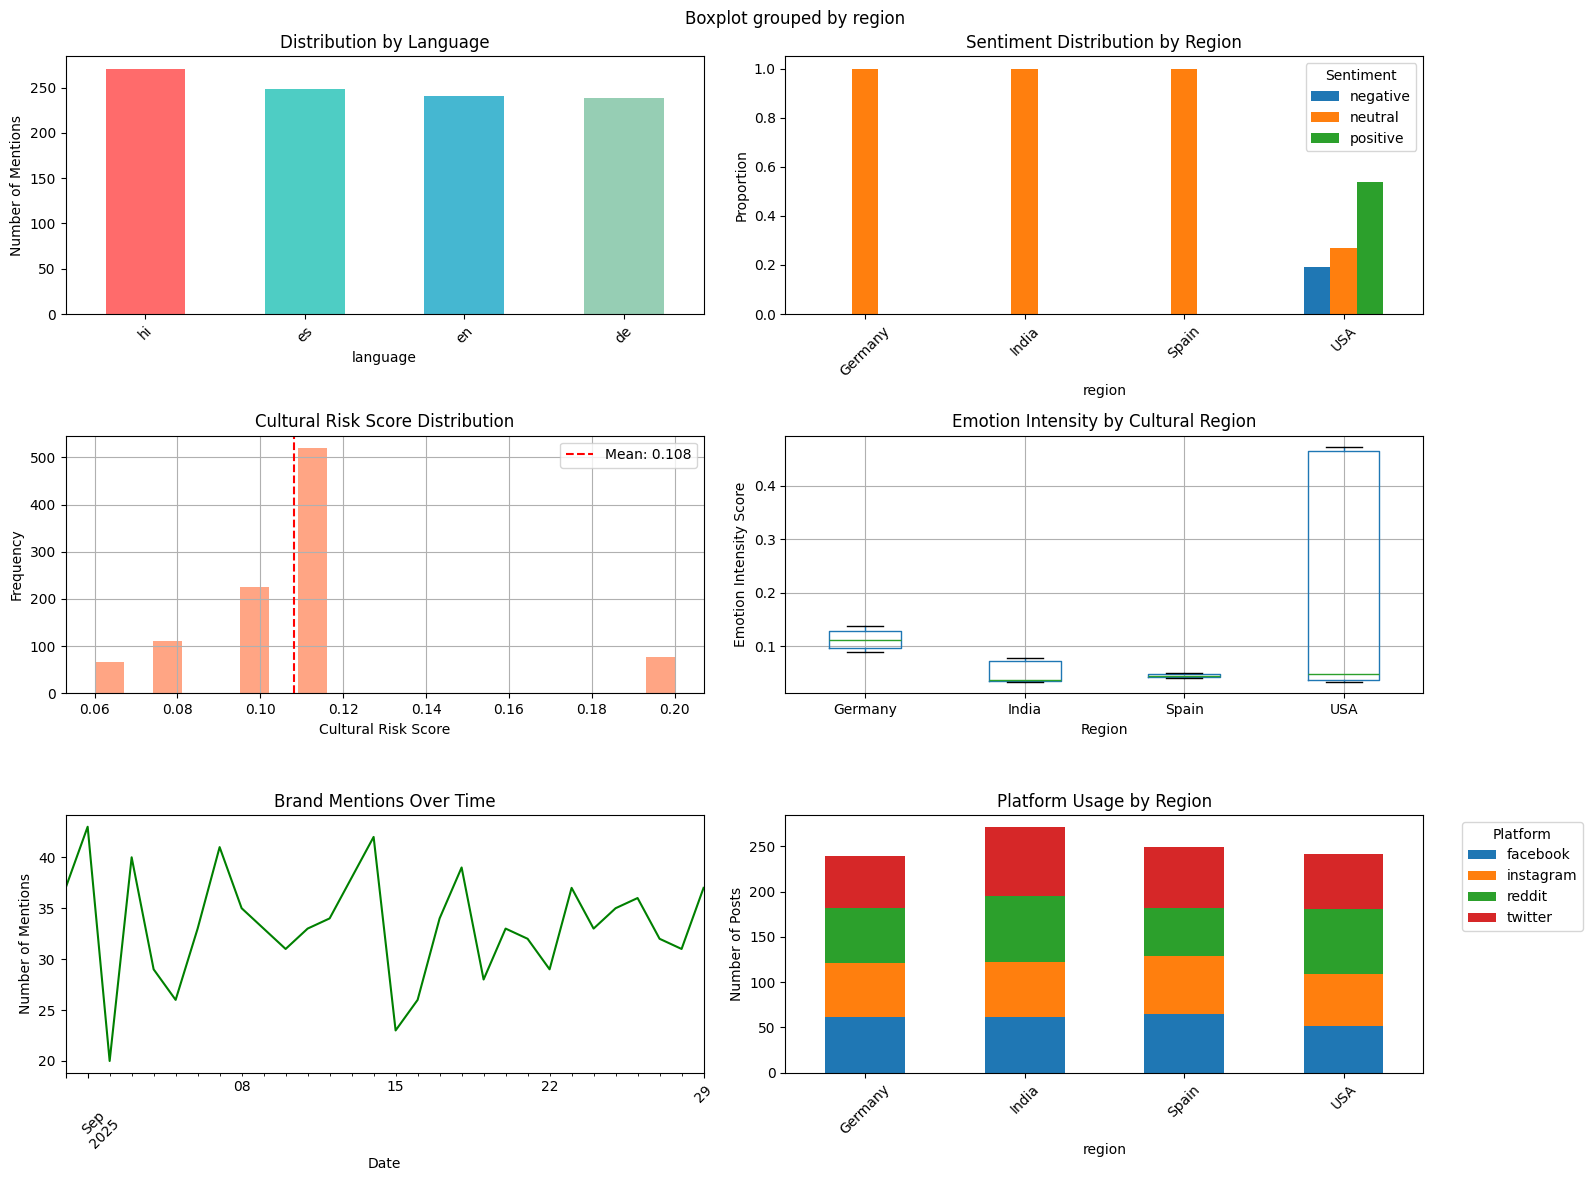

 Exploration complete!
 Generated files:
   - brand_analysis_dashboard.png
   - exploration_summary.json


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Use the df generated by process_brand_data
if df is None:
    print("Error: DataFrame is not available. Please run process_brand_data() first.")
else:
    print("Generating visualizations...")

    # ----------------------------
    # Precompute sentiment by region
    # ----------------------------
    sentiment_col = None
    if "advanced_sentiment" in df.columns:
        sentiment_col = "advanced_sentiment"
    elif "sentiment" in df.columns:
        sentiment_col = "sentiment"
    else:
        raise KeyError("Neither 'sentiment' nor 'advanced_sentiment' found in DataFrame.")

    sentiment_by_region = (
        df.groupby(['region', sentiment_col]).size()
          .unstack(fill_value=0)
    )
    # Normalize rows to proportions
    sentiment_by_region = sentiment_by_region.div(
        sentiment_by_region.sum(axis=1), axis=0
    )

    # ----------------------------
    # Precompute other stats
    # ----------------------------
    cultural_stats = df['cultural_risk_score'].describe()
    top_brands = df['brand'].value_counts().head(10)

    # ----------------------------
    # Create plots
    # ----------------------------
    fig, axes = plt.subplots(3, 2, figsize=(16, 12))

    # 1. Language Distribution
    df['language'].value_counts().plot(
        kind='bar',
        ax=axes[0,0],
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    )
    axes[0,0].set_title('Distribution by Language')
    axes[0,0].set_ylabel('Number of Mentions')
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Sentiment by Region
    sentiment_by_region.plot(kind='bar', ax=axes[0,1], stacked=False)
    axes[0,1].set_title('Sentiment Distribution by Region')
    axes[0,1].set_ylabel('Proportion')
    axes[0,1].legend(title='Sentiment')
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Cultural Risk Distribution
    df['cultural_risk_score'].hist(bins=20, ax=axes[1,0], color='coral', alpha=0.7)
    axes[1,0].axvline(df['cultural_risk_score'].mean(), color='red', linestyle='--',
                      label=f'Mean: {df['cultural_risk_score'].mean():.3f}')
    axes[1,0].set_title('Cultural Risk Score Distribution')
    axes[1,0].set_xlabel('Cultural Risk Score')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()

    # 4. Emotion Intensity by Culture
    df.boxplot(column='emotion_intensity', by='region', ax=axes[1,1])
    axes[1,1].set_title('Emotion Intensity by Cultural Region')
    axes[1,1].set_xlabel('Region')
    axes[1,1].set_ylabel('Emotion Intensity Score')

    # 5. Brand Mentions Over Time
    df_time = df.set_index('timestamp').resample('D')['text'].count()
    df_time.plot(ax=axes[2,0], color='green')
    axes[2,0].set_title('Brand Mentions Over Time')
    axes[2,0].set_xlabel('Date')
    axes[2,0].set_ylabel('Number of Mentions')
    axes[2,0].tick_params(axis='x', rotation=45)

    # 6. Platform Usage by Region
    platform_region = pd.crosstab(df['region'], df['platform'])
    platform_region.plot(kind='bar', ax=axes[2,1], stacked=True)
    axes[2,1].set_title('Platform Usage by Region')
    axes[2,1].set_ylabel('Number of Posts')
    axes[2,1].legend(title='Platform', bbox_to_anchor=(1.05, 1))
    axes[2,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('brand_analysis_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

    # ----------------------------
    # Save exploration summary
    # ----------------------------
    exploration_summary = {
        'dataset_size': len(df),
        'languages': df['language'].value_counts().to_dict(),
        'sentiment_by_region': sentiment_by_region.to_dict(),
        'cultural_stats': cultural_stats.to_dict(),
        'top_brands': top_brands.to_dict(),
        'avg_engagement_by_platform': df.groupby('platform')['engagement'].mean().to_dict()
    }

    with open('exploration_summary.json', 'w') as f:
        json.dump(exploration_summary, f, indent=2, default=str)

    print(" Exploration complete!")
    print(" Generated files:")
    print("   - brand_analysis_dashboard.png")
    print("   - exploration_summary.json")


COMPLETE CULTURAL CONTEXT DATABASE IMPLEMENTATION

In [18]:
class CulturalContextDB:
    """
    Complete cultural context database for analyzing cultural appropriateness
    and risk assessment across different regions and cultures.
    """

    def __init__(self):
        """
        Initialize cultural profiles and context databases
        """
        self.cultural_profiles = self.create_cultural_profiles()
        self.sensitive_keywords = self.create_sensitive_keywords_db()
        self.positive_themes = self.create_positive_themes_db()
        self.communication_styles = self.create_communication_styles_db()

    def create_cultural_profiles(self):
        """
        Create comprehensive cultural profiles based on Hofstede's cultural dimensions
        and cross-cultural communication research
        """
        return {
            'USA': {
                'hofstede_scores': {
                    'power_distance': 40,        # Low - egalitarian
                    'individualism': 91,         # Very high - individual focus
                    'masculinity': 62,           # Moderate-high - competitive
                    'uncertainty_avoidance': 46, # Low - comfortable with ambiguity
                    'long_term_orientation': 26  # Low - short-term focused
                },
                'communication_style': {
                    'directness': 0.8,           # Very direct communication
                    'formality': 0.3,            # Informal
                    'emotional_expression': 0.6, # Moderate emotion
                    'context_dependency': 0.2    # Low context culture
                },
                'marketing_preferences': [
                    'individual_achievement', 'innovation', 'convenience',
                    'personal_freedom', 'success', 'efficiency'
                ],
                'sensitive_topics': [
                    'politics', 'gun_control', 'healthcare', 'race',
                    'religion', 'income_inequality'
                ],
                'positive_themes': [
                    'innovation', 'success', 'freedom', 'convenience',
                    'personal_achievement', 'cutting_edge', 'leadership'
                ],
                'avoid_themes': [
                    'collectivism', 'authority', 'tradition_over_innovation'
                ],
                'preferred_tone': 'confident_enthusiastic',
                'emoji_acceptance': 0.8,
                'slang_acceptance': 0.9
            },

            'Germany': {
                'hofstede_scores': {
                    'power_distance': 35,        # Low - egalitarian
                    'individualism': 67,         # High - individual focus
                    'masculinity': 66,           # High - competitive
                    'uncertainty_avoidance': 65, # Moderate-high - prefers structure
                    'long_term_orientation': 83  # Very high - future-oriented
                },
                'communication_style': {
                    'directness': 0.9,           # Very direct
                    'formality': 0.7,            # More formal
                    'emotional_expression': 0.4, # Reserved
                    'context_dependency': 0.3    # Low-medium context
                },
                'marketing_preferences': [
                    'quality', 'reliability', 'engineering', 'precision',
                    'environmental_sustainability', 'long_term_value'
                ],
                'sensitive_topics': [
                    'data_privacy', 'environmental_impact', 'work_life_balance',
                    'corporate_responsibility', 'historical_references'
                ],
                'positive_themes': [
                    'quality', 'engineering_excellence', 'sustainability',
                    'efficiency', 'reliability', 'precision', 'expertise'
                ],
                'avoid_themes': [
                    'flashy_marketing', 'data_collection', 'waste', 'superficiality'
                ],
                'preferred_tone': 'professional_factual',
                'emoji_acceptance': 0.3,
                'slang_acceptance': 0.2
            },

            'India': {
                'hofstede_scores': {
                    'power_distance': 77,        # High - hierarchical
                    'individualism': 48,         # Moderate - balance of individual/collective
                    'masculinity': 56,           # Moderate - balanced gender roles
                    'uncertainty_avoidance': 40, # Low-moderate - adaptable
                    'long_term_orientation': 51  # Moderate - balanced time orientation
                },
                'communication_style': {
                    'directness': 0.4,           # Indirect, respectful
                    'formality': 0.6,            # Respectful formality
                    'emotional_expression': 0.7, # Warm, expressive
                    'context_dependency': 0.7    # High context culture
                },
                'marketing_preferences': [
                    'family_values', 'tradition', 'respect', 'value_for_money',
                    'community', 'relationships', 'cultural_pride'
                ],
                'sensitive_topics': [
                    'religion', 'caste', 'regional_differences', 'cultural_appropriation',
                    'western_vs_traditional_values'
                ],
                'positive_themes': [
                    'family', 'tradition', 'respect', 'community', 'value',
                    'cultural_heritage', 'relationships', 'wisdom'
                ],
                'avoid_themes': [
                    'individualism_over_family', 'disrespect_to_elders',
                    'cultural_insensitivity'
                ],
                'preferred_tone': 'respectful_warm',
                'emoji_acceptance': 0.6,
                'slang_acceptance': 0.5
            },

            'Spain': {
                'hofstede_scores': {
                    'power_distance': 57,        # Moderate - some hierarchy
                    'individualism': 51,         # Moderate - balanced
                    'masculinity': 42,           # Low-moderate - cooperative
                    'uncertainty_avoidance': 86, # High - prefers certainty
                    'long_term_orientation': 48  # Moderate - balanced time view
                },
                'communication_style': {
                    'directness': 0.6,           # Moderately direct
                    'formality': 0.5,            # Balanced formality
                    'emotional_expression': 0.8, # Very expressive
                    'context_dependency': 0.6    # Medium-high context
                },
                'marketing_preferences': [
                    'community', 'celebration', 'warmth', 'family',
                    'passion', 'enjoyment', 'social_connection'
                ],
                'sensitive_topics': [
                    'regional_identity', 'economic_struggles', 'unemployment',
                    'political_tensions', 'cultural_stereotypes'
                ],
                'positive_themes': [
                    'community', 'celebration', 'passion', 'family',
                    'enjoyment', 'social_bonds', 'cultural_pride'
                ],
                'avoid_themes': [
                    'cold_professionalism', 'individual_over_community', 'stereotypes'
                ],
                'preferred_tone': 'warm_passionate',
                'emoji_acceptance': 0.8,
                'slang_acceptance': 0.6
            }
        }

    def create_sensitive_keywords_db(self):
        """
        Database of culturally sensitive keywords by region
        """
        return {
            'USA': {
                'high_risk': ['trump', 'biden', 'republican', 'democrat', 'gun', 'abortion', 'racist'],
                'medium_risk': ['politics', 'election', 'government', 'tax', 'healthcare', 'immigration'],
                'context_dependent': ['freedom', 'rights', 'patriot', 'american', 'constitution']
            },
            'Germany': {
                'high_risk': ['nazi', 'hitler', 'holocaust', 'surveillance', 'data collection', 'privacy breach'],
                'medium_risk': ['data', 'privacy', 'tracking', 'personal information', 'cookies', 'gdpr'],
                'context_dependent': ['efficiency', 'order', 'traditional', 'european', 'environment']
            },
            'India': {
                'high_risk': ['caste', 'cow', 'beef', 'muslim', 'hindu', 'partition', 'kashmir'],
                'medium_risk': ['religion', 'community', 'traditional', 'western', 'colonial'],
                'context_dependent': ['family', 'respect', 'elder', 'culture', 'tradition']
            },
            'Spain': {
                'high_risk': ['franco', 'civil war', 'catalonia', 'basque', 'separatist'],
                'medium_risk': ['regional', 'independence', 'crisis', 'unemployment', 'austerity'],
                'context_dependent': ['regional', 'community', 'local', 'spanish', 'european']
            }
        }

    def create_positive_themes_db(self):
        """
        Database of culturally positive themes and keywords
        """
        return {
            'USA': {
                'innovation': ['cutting-edge', 'breakthrough', 'revolutionary', 'next-gen'],
                'success': ['achievement', 'winner', 'champion', 'leader', 'best'],
                'freedom': ['choice', 'liberty', 'independence', 'personal'],
                'convenience': ['easy', 'fast', 'simple', 'efficient', 'convenient']
            },
            'Germany': {
                'quality': ['precision', 'engineered', 'crafted', 'reliable', 'durable'],
                'sustainability': ['eco', 'green', 'sustainable', 'renewable', 'environmental'],
                'efficiency': ['optimized', 'streamlined', 'effective', 'productive'],
                'expertise': ['expert', 'professional', 'technical', 'specialized']
            },
            'India': {
                'family': ['family', 'parents', 'children', 'generations', 'home'],
                'value': ['affordable', 'value', 'worth', 'budget', 'economical'],
                'respect': ['respect', 'honor', 'dignity', 'tradition', 'wisdom'],
                'community': ['together', 'community', 'sharing', 'collective', 'unity']
            },
            'Spain': {
                'community': ['together', 'community', 'friends', 'social', 'group'],
                'celebration': ['celebration', 'festival', 'joy', 'party', 'fiesta'],
                'passion': ['passion', 'love', 'heart', 'soul', 'emotion'],
                'warmth': ['warm', 'welcoming', 'friendly', 'caring', 'loving']
            }
        }

    def create_communication_styles_db(self):
        """
        Communication style indicators by culture
        """
        return {
            'formal_indicators': ['respectfully', 'sincerely', 'please', 'thank you', 'appreciate'],
            'informal_indicators': ['awesome', 'cool', 'fire', 'lit', 'sick', 'dope', 'amazing'],
            'emotional_indicators': ['!', '❤️', '🔥', '😍', '😊', '🎉', 'love', 'hate', 'amazing'],
            'direct_indicators': ['must', 'should', 'need to', 'have to', 'required', 'necessary'],
            'indirect_indicators': ['might', 'could', 'perhaps', 'maybe', 'possibly', 'consider']
        }

    def get_cultural_risk_score(self, text, region):
        """
        Calculate comprehensive cultural risk score for text in specific region

        Args:
            text (str): The text content to analyze
            region (str): Target cultural region ('USA', 'Germany', 'India', 'Spain')

        Returns:
            float: Risk score from 0.0 (low risk) to 1.0 (high risk)
        """
        if not text or region not in self.cultural_profiles:
            return 0.5  # Neutral risk for unknown regions or empty text

        risk_score = 0.0
        text_lower = text.lower()
        profile = self.cultural_profiles[region]

        # 1. Check for sensitive keywords (40% of total risk)
        sensitive_keywords = self.sensitive_keywords.get(region, {})

        # High risk keywords
        for keyword in sensitive_keywords.get('high_risk', []):
            if keyword in text_lower:
                risk_score += 0.3  # Each high-risk keyword adds significant risk

        # Medium risk keywords
        for keyword in sensitive_keywords.get('medium_risk', []):
            if keyword in text_lower:
                risk_score += 0.15  # Each medium-risk keyword adds moderate risk

        # 2. Communication style mismatch (25% of total risk)
        style_mismatch = self.analyze_style_mismatch(text, region)
        risk_score += style_mismatch * 0.25

        # 3. Tone appropriateness (20% of total risk)
        tone_risk = self.analyze_tone_risk(text, region)
        risk_score += tone_risk * 0.20

        # 4. Cultural theme alignment (15% of total risk)
        theme_risk = self.analyze_theme_alignment(text, region)
        risk_score += theme_risk * 0.15

        # Normalize to 0-1 range
        final_risk = min(1.0, max(0.0, risk_score))

        return final_risk

    def analyze_style_mismatch(self, text, region):
        """
        Analyze if communication style matches cultural expectations
        """
        profile = self.cultural_profiles[region]
        style = profile['communication_style']
        text_lower = text.lower()

        mismatch_score = 0.0

        # Check formality mismatch
        formal_count = sum(1 for word in self.communication_styles['formal_indicators']
                          if word in text_lower)
        informal_count = sum(1 for word in self.communication_styles['informal_indicators']
                            if word in text_lower)

        expected_formality = style['formality']
        actual_formality = formal_count / max(1, formal_count + informal_count)

        formality_mismatch = abs(expected_formality - actual_formality)
        mismatch_score += formality_mismatch * 0.4

        # Check emotional expression mismatch
        emotion_count = sum(1 for indicator in self.communication_styles['emotional_indicators']
                           if indicator in text_lower)
        text_length = len(text.split())
        actual_emotion = min(1.0, emotion_count / max(1, text_length / 10))

        expected_emotion = style['emotional_expression']
        emotion_mismatch = abs(expected_emotion - actual_emotion)
        mismatch_score += emotion_mismatch * 0.3

        # Check directness mismatch
        direct_count = sum(1 for word in self.communication_styles['direct_indicators']
                          if word in text_lower)
        indirect_count = sum(1 for word in self.communication_styles['indirect_indicators']
                            if word in text_lower)

        if direct_count + indirect_count > 0:
            actual_directness = direct_count / (direct_count + indirect_count)
            expected_directness = style['directness']
            directness_mismatch = abs(expected_directness - actual_directness)
            mismatch_score += directness_mismatch * 0.3

        return min(1.0, mismatch_score)

    def analyze_tone_risk(self, text, region):
        """
        Analyze if tone is appropriate for the cultural context
        """
        profile = self.cultural_profiles[region]
        preferred_tone = profile['preferred_tone']
        text_lower = text.lower()

        tone_risk = 0.0

        # Aggressive language indicators
        aggressive_words = ['must', 'should', 'need to', 'have to', 'required', 'demand']
        aggressive_count = sum(1 for word in aggressive_words if word in text_lower)

        # Adjust risk based on cultural preferences
        if region in ['Germany', 'India'] and aggressive_count > 0:
            tone_risk += 0.4  # Germans and Indians prefer softer approaches
        elif region == 'USA' and aggressive_count == 0 and len(text.split()) > 10:
            tone_risk += 0.2  # Americans expect some assertiveness

        # Check for cultural tone preferences
        if preferred_tone == 'professional_factual' and any(word in text_lower
                                                           for word in ['awesome', 'fire', 'lit']):
            tone_risk += 0.5  # Slang inappropriate for German market

        if preferred_tone == 'respectful_warm' and any(word in text_lower
                                                      for word in ['must', 'demand', 'required']):
            tone_risk += 0.4  # Too aggressive for Indian market

        return min(1.0, tone_risk)

    def analyze_theme_alignment(self, text, region):
        """
        Analyze if themes align with cultural values
        """
        profile = self.cultural_profiles[region]
        avoid_themes = profile['avoid_themes']
        text_lower = text.lower()

        theme_risk = 0.0

        # Check for themes to avoid
        theme_mapping = {
            'collectivism': ['together', 'group', 'collective', 'community'],
            'authority': ['authority', 'boss', 'command', 'order'],
            'tradition_over_innovation': ['traditional', 'old-way', 'classic', 'conventional'],
            'flashy_marketing': ['amazing', 'incredible', 'fantastic', 'awesome'],
            'individualism_over_family': ['personal', 'individual', 'self', 'alone'],
            'cold_professionalism': ['professional', 'business', 'corporate', 'formal']
        }

        for avoid_theme in avoid_themes:
            if avoid_theme in theme_mapping:
                theme_words = theme_mapping[avoid_theme]
                if any(word in text_lower for word in theme_words):
                    theme_risk += 0.3

        return min(1.0, theme_risk)

    def get_cultural_recommendations(self, text, region, risk_score):
        """
        Provide specific recommendations for improving cultural appropriateness
        """
        if region not in self.cultural_profiles:
            return ["Unknown region - cannot provide specific recommendations"]

        profile = self.cultural_profiles[region]
        recommendations = []

        if risk_score > 0.7:
            recommendations.append(f"⚠️ High cultural risk detected for {region} market")

        # Style recommendations
        if region == 'Germany':
            if any(word in text.lower() for word in ['fire', 'lit', 'awesome']):
                recommendations.append("Consider replacing slang with professional language for German market")
            if 'data' in text.lower() or 'tracking' in text.lower():
                recommendations.append("Add privacy assurances for German audience concerned about data protection")

        elif region == 'India':
            if any(word in text.lower() for word in ['must', 'should', 'required']):
                recommendations.append("Use softer, more respectful language for Indian market")
            if not any(word in text.lower() for word in ['family', 'community', 'value']):
                recommendations.append("Consider adding family-oriented or community themes")

        elif region == 'USA':
            if risk_score < 0.3 and len(text.split()) > 15:
                recommendations.append("Content might be too conservative - Americans appreciate confident messaging")

        elif region == 'Spain':
            if not any(word in text.lower() for word in ['community', 'together', 'celebration']):
                recommendations.append("Consider adding community or celebration themes for Spanish market")

        # Add positive theme suggestions
        positive_themes = profile['positive_themes'][:3]
        recommendations.append(f"💡 Consider incorporating themes: {', '.join(positive_themes)}")

        return recommendations if recommendations else ["Content appears culturally appropriate"]

    def get_region_profile_summary(self, region):
        """
        Get a summary of cultural profile for a region
        """
        if region not in self.cultural_profiles:
            return "Region profile not available"

        profile = self.cultural_profiles[region]

        summary = f"""
        Cultural Profile for {region}:

        Communication Style:
        - Directness: {profile['communication_style']['directness']:.1f}/1.0
        - Formality: {profile['communication_style']['formality']:.1f}/1.0
        - Emotional Expression: {profile['communication_style']['emotional_expression']:.1f}/1.0

        Preferred Themes: {', '.join(profile['positive_themes'][:5])}
        Sensitive Topics: {len(profile['sensitive_topics'])} identified
        Preferred Tone: {profile['preferred_tone'].replace('_', ' ').title()}
        """

        return summary.strip()

In [19]:
# Ensure 'cultural_db' variable is available here
import pickle

print("Saving Cultural Context DB...")
try:
    with open('cultural_db.pkl', 'wb') as f:
        pickle.dump(cultural_db, f)
    print("✅ cultural_db.pkl saved successfully.")
except Exception as e:
    print(f"🔴 ERROR during save: {e}")
    # This error should now be fixed, but watch the output!

Saving Cultural Context DB...
🔴 ERROR during save: Can't pickle <class '__main__.CulturalContextDB'>: it's not the same object as __main__.CulturalContextDB


In [20]:
    def create_positive_themes_db(self):
        """
        Database of culturally positive themes and keywords
        """
        return {
            'USA': {
                'innovation': ['cutting-edge', 'breakthrough', 'revolutionary', 'next-gen'],
                'success': ['achievement', 'winner', 'champion', 'leader', 'best'],
                'freedom': ['choice', 'liberty', 'independence', 'personal'],
                'convenience': ['easy', 'fast', 'simple', 'efficient', 'convenient']
            },
            'Germany': {
                'quality': ['precision', 'engineered', 'crafted', 'reliable', 'durable'],
                'sustainability': ['eco', 'green', 'sustainable', 'renewable', 'environmental'],
                'efficiency': ['optimized', 'streamlined', 'effective', 'productive'],
                'expertise': ['expert', 'professional', 'technical', 'specialized']
            },
            'India': {
                'family': ['family', 'parents', 'children', 'generations', 'home'],
                'value': ['affordable', 'value', 'worth', 'budget', 'economical'],
                'respect': ['respect', 'honor', 'dignity', 'tradition', 'wisdom'],
                'community': ['together', 'community', 'sharing', 'collective', 'unity']
            },
            'Spain': {
                'community': ['together', 'community', 'friends', 'social', 'group'],
                'celebration': ['celebration', 'festival', 'joy', 'party', 'fiesta'],
                'passion': ['passion', 'love', 'heart', 'soul', 'emotion'],
                'warmth': ['warm', 'welcoming', 'friendly', 'caring', 'loving']
            }
        }

    def create_communication_styles_db(self):
        """
        Communication style indicators by culture
        """
        return {
            'formal_indicators': ['respectfully', 'sincerely', 'please', 'thank you', 'appreciate'],
            'informal_indicators': ['awesome', 'cool', 'fire', 'lit', 'sick', 'dope', 'amazing'],
            'emotional_indicators': ['!', '❤️', '🔥', '😍', '😊', '🎉', 'love', 'hate', 'amazing'],
            'direct_indicators': ['must', 'should', 'need to', 'have to', 'required', 'necessary'],
            'indirect_indicators': ['might', 'could', 'perhaps', 'maybe', 'possibly', 'consider']
        }

    def get_cultural_risk_score(self, text, region):
        """
        Calculate comprehensive cultural risk score for text in specific region

        Args:
            text (str): The text content to analyze
            region (str): Target cultural region ('USA', 'Germany', 'India', 'Spain')

        Returns:
            float: Risk score from 0.0 (low risk) to 1.0 (high risk)
        """
        if not text or region not in self.cultural_profiles:
            return 0.5  # Neutral risk for unknown regions or empty text

        risk_score = 0.0
        text_lower = text.lower()
        profile = self.cultural_profiles[region]

        # 1. Check for sensitive keywords (40% of total risk)
        sensitive_keywords = self.sensitive_keywords.get(region, {})

        # High risk keywords
        for keyword in sensitive_keywords.get('high_risk', []):
            if keyword in text_lower:
                risk_score += 0.3  # Each high-risk keyword adds significant risk

        # Medium risk keywords
        for keyword in sensitive_keywords.get('medium_risk', []):
            if keyword in text_lower:
                risk_score += 0.15  # Each medium-risk keyword adds moderate risk

        # 2. Communication style mismatch (25% of total risk)
        style_mismatch = self.analyze_style_mismatch(text, region)
        risk_score += style_mismatch * 0.25

        # 3. Tone appropriateness (20% of total risk)
        tone_risk = self.analyze_tone_risk(text, region)
        risk_score += tone_risk * 0.20

        # 4. Cultural theme alignment (15% of total risk)
        theme_risk = self.analyze_theme_alignment(text, region)
        risk_score += theme_risk * 0.15

        # Normalize to 0-1 range
        final_risk = min(1.0, max(0.0, risk_score))

        return final_risk

    def analyze_style_mismatch(self, text, region):
        """
        Analyze if communication style matches cultural expectations
        """
        profile = self.cultural_profiles[region]
        style = profile['communication_style']
        text_lower = text.lower()

        mismatch_score = 0.0

        # Check formality mismatch
        formal_count = sum(1 for word in self.communication_styles_db['formal_indicators']
                          if word in text_lower)
        informal_count = sum(1 for word in self.communication_styles_db['informal_indicators']
                            if word in text_lower)

        expected_formality = style['formality']
        actual_formality = formal_count / max(1, formal_count + informal_count)

        formality_mismatch = abs(expected_formality - actual_formality)
        mismatch_score += formality_mismatch * 0.4

        # Check emotional expression mismatch
        emotion_count = sum(1 for indicator in self.communication_styles_db['emotional_indicators']
                           if indicator in text_lower)
        text_length = len(text.split())
        actual_emotion = min(1.0, emotion_count / max(1, text_length / 10))

        expected_emotion = style['emotional_expression']
        emotion_mismatch = abs(expected_emotion - actual_emotion)
        mismatch_score += emotion_mismatch * 0.3

        # Check directness mismatch
        direct_count = sum(1 for word in self.communication_styles_db['direct_indicators']
                          if word in text_lower)
        indirect_count = sum(1 for word in self.communication_styles_db['indirect_indicators']
                            if word in text_lower)

        if direct_count + indirect_count > 0:
            actual_directness = direct_count / (direct_count + indirect_count)
            expected_directness = style['directness']
            directness_mismatch = abs(expected_directness - actual_directness)
            mismatch_score += directness_mismatch * 0.3

        return min(1.0, mismatch_score)

    def analyze_tone_risk(self, text, region):
        """
        Analyze if tone is appropriate for the cultural context
        """
        profile = self.cultural_profiles[region]
        preferred_tone = profile['preferred_tone']
        text_lower = text.lower()

        tone_risk = 0.0

        # Aggressive language indicators
        aggressive_words = ['must', 'should', 'need to', 'have to', 'required', 'demand']
        aggressive_count = sum(1 for word in aggressive_words if word in text_lower)

        # Adjust risk based on cultural preferences
        if region in ['Germany', 'India'] and aggressive_count > 0:
            tone_risk += 0.4  # Germans and Indians prefer softer approaches
        elif region == 'USA' and aggressive_count == 0 and len(text.split()) > 10:
            tone_risk += 0.2  # Americans expect some assertiveness

        # Check for cultural tone preferences
        if preferred_tone == 'professional_factual' and any(word in text_lower
                                                           for word in ['awesome', 'fire', 'lit']):
            tone_risk += 0.5  # Slang inappropriate for German market

        if preferred_tone == 'respectful_warm' and any(word in text_lower
                                                      for word in ['must', 'demand', 'required']):
            tone_risk += 0.4  # Too aggressive for Indian market

        return min(1.0, tone_risk)

    def analyze_theme_alignment(self, text, region):
        """
        Analyze if themes align with cultural values
        """
        profile = self.cultural_profiles[region]
        avoid_themes = profile['avoid_themes']
        text_lower = text.lower()

        theme_risk = 0.0

        # Check for themes to avoid
        theme_mapping = {
            'collectivism': ['together', 'group', 'collective', 'community'],
            'authority': ['authority', 'boss', 'command', 'order'],
            'tradition_over_innovation': ['traditional', 'old-way', 'classic', 'conventional'],
            'flashy_marketing': ['amazing', 'incredible', 'fantastic', 'awesome'],
            'individualism_over_family': ['personal', 'individual', 'self', 'alone'],
            'cold_professionalism': ['professional', 'business', 'corporate', 'formal']
        }

        for avoid_theme in avoid_themes:
            if avoid_theme in theme_mapping:
                theme_words = theme_mapping[avoid_theme]
                if any(word in text_lower for word in theme_words):
                    theme_risk += 0.3

        return min(1.0, theme_risk)

    def get_cultural_recommendations(self, text, region, risk_score):
        """
        Provide specific recommendations for improving cultural appropriateness
        """
        if region not in self.cultural_profiles:
            return ["Unknown region - cannot provide specific recommendations"]

        profile = self.cultural_profiles[region]
        recommendations = []

        if risk_score > 0.7:
            recommendations.append(f"⚠️ High cultural risk detected for {region} market")

        # Style recommendations
        if region == 'Germany':
            if any(word in text.lower() for word in ['fire', 'lit', 'awesome']):
                recommendations.append("Consider replacing slang with professional language for German market")
            if 'data' in text.lower() or 'tracking' in text.lower():
                recommendations.append("Add privacy assurances for German audience concerned about data protection")

        elif region == 'India':
            if any(word in text.lower() for word in ['must', 'should', 'required']):
                recommendations.append("Use softer, more respectful language for Indian market")
            if not any(word in text.lower() for word in ['family', 'community', 'value']):
                recommendations.append("Consider adding family-oriented or community themes")

        elif region == 'USA':
            if risk_score < 0.3 and len(text.split()) > 15:
                recommendations.append("Content might be too conservative - Americans appreciate confident messaging")

        elif region == 'Spain':
            if not any(word in text.lower() for word in ['community', 'together', 'celebration']):
                recommendations.append("Consider adding community or celebration themes for Spanish market")

        # Add positive theme suggestions
        positive_themes = profile['positive_themes'][:3]
        recommendations.append(f"💡 Consider incorporating themes: {', '.join(positive_themes)}")

        return recommendations if recommendations else ["Content appears culturally appropriate"]

    def get_region_profile_summary(self, region):
        """
        Get a summary of cultural profile for a region
        """
        if region not in self.cultural_profiles:
            return "Region profile not available"

        profile = self.cultural_profiles[region]

        summary = f"""
        Cultural Profile for {region}:

        Communication Style:
        - Directness: {profile['communication_style']['directness']:.1f}/1.0
        - Formality: {profile['communication_style']['formality']:.1f}/1.0
        - Emotional Expression: {profile['communication_style']['emotional_expression']:.1f}/1.0

        Preferred Themes: {', '.join(profile['positive_themes'][:5])}
        Sensitive Topics: {len(profile['sensitive_topics'])} identified
        Preferred Tone: {profile['preferred_tone'].replace('_', ' ').title()}
        """

        return summary.strip()

TESTING FUNCTION

In [21]:
def test_cultural_context_db():
    """
    Test the CulturalContextDB with various examples
    """
    print("Testing Cultural Context Database...")

    db = CulturalContextDB()

    # Test cases with different cultural contexts
    test_cases = [
        {
            'text': "Just got the new Nike shoes - they're absolutely fire! 🔥",
            'region': 'USA'
        },
        {
            'text': "Nike Schuhe haben gute Qualität, aber Datenschutz ist wichtig",
            'region': 'Germany'
        },
        {
            'text': "Nike के जूते family के लिए perfect हैं और value for money भी है",
            'region': 'India'
        },
        {
            'text': "Nike tiene diseños increíbles para toda la comunidad",
            'region': 'Spain'
        }
    ]

    for i, test_case in enumerate(test_cases, 1):
        print(f"\n Test Case {i}: {test_case['region']}")
        print(f"Text: {test_case['text']}")

        risk_score = db.get_cultural_risk_score(test_case['text'], test_case['region'])
        print(f"Risk Score: {risk_score:.3f}")

        recommendations = db.get_cultural_recommendations(test_case['text'], test_case['region'], risk_score)
        print("Recommendations:")
        for rec in recommendations:
            print(f"  - {rec}")

    print("\n Cultural Context Database testing complete!")
    return db

# Run test if executed directly
if __name__ == "__main__":
    test_db = test_cultural_context_db()

Testing Cultural Context Database...

 Test Case 1: USA
Text: Just got the new Nike shoes - they're absolutely fire! 🔥
Risk Score: 0.100
Recommendations:
  - 💡 Consider incorporating themes: innovation, success, freedom

 Test Case 2: Germany
Text: Nike Schuhe haben gute Qualität, aber Datenschutz ist wichtig
Risk Score: 0.200
Recommendations:
  - Consider replacing slang with professional language for German market
  - 💡 Consider incorporating themes: quality, engineering_excellence, sustainability

 Test Case 3: India
Text: Nike के जूते family के लिए perfect हैं और value for money भी है
Risk Score: 0.112
Recommendations:
  - 💡 Consider incorporating themes: family, tradition, respect

 Test Case 4: Spain
Text: Nike tiene diseños increíbles para toda la comunidad
Risk Score: 0.110
Recommendations:
  - Consider adding community or celebration themes for Spanish market
  - 💡 Consider incorporating themes: community, celebration, passion

 Cultural Context Database testing complete!


# 2. Model Training & Advanced NLP Pipeline

In [22]:
# Install required packages for model training
!pip install transformers torch torchvision torchaudio
!pip install datasets scikit-learn matplotlib seaborn
!pip install plotly wordcloud langdetect
!pip install sentence-transformers umap-learn



In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import json
import pickle
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# ML and NLP libraries
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    AutoModel, pipeline, Trainer, TrainingArguments
)
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
import umap

print("✅ All packages installed successfully!")


✅ All packages installed successfully!


In [24]:
def load_processed_data():
    """
    Load the processed data from Day 1
    """
    try:
        df = pd.read_csv('multilingual_brand_data.csv')
        print(f" Loaded {len(df)} samples from Day 1")
        print(f"Languages: {df['language'].value_counts().to_dict()}")
        print(f"Regions: {df['region'].value_counts().to_dict()}")
        return df
    except FileNotFoundError:
        print(" Data file not found. Please run Day 1 notebook first.")
        # Create sample data for demonstration
        print(" Creating sample data for testing...")
        return create_sample_training_data()

def create_sample_training_data():
    """
    Create sample training data if Day 1 data is not available
    """
    sample_data = []

    # English samples
    english_samples = [
        ("Nike shoes are absolutely amazing! Love the quality 🔥", "positive", "en", "USA"),
        ("Adidas customer service is terrible, very disappointed", "negative", "en", "USA"),
        ("Samsung phone is okay, nothing special", "neutral", "en", "USA"),
        ("Apple products are overpriced but good quality", "neutral", "en", "USA"),
        ("Tesla innovation is changing the world!", "positive", "en", "USA"),
    ]

    # German samples
    german_samples = [
        ("Nike Qualität ist gut, aber der Preis ist zu hoch", "neutral", "de", "Germany"),
        ("Samsung Datenschutz ist sehr wichtig für mich", "neutral", "de", "Germany"),
        ("Apple Produkte sind zuverlässig und langlebig", "positive", "de", "Germany"),
        ("McDonald's sollte umweltfreundlicher werden", "negative", "de", "Germany"),
        ("Tesla Technologie ist beeindruckend", "positive", "de", "Germany"),
    ]

    # Hindi samples
    hindi_samples = [
        ("Nike के जूते family के लिए perfect हैं", "positive", "hi", "India"),
        ("Samsung का phone value for money है", "positive", "hi", "India"),
        ("Apple की customer service India में better हो सकती है", "negative", "hi", "India"),
        ("McDonald's में vegetarian options कम हैं", "negative", "hi", "India"),
        ("Coca-Cola हमारे celebrations का हिस्सा है", "positive", "hi", "India"),
    ]

    # Spanish samples
    spanish_samples = [
        ("Nike tiene diseños increíbles para la comunidad", "positive", "es", "Spain"),
        ("Samsung ofrece buena calidad para familias", "positive", "es", "Spain"),
        ("Apple es muy caro para mi presupuesto", "negative", "es", "Spain"),
        ("McDonald's debería tener más opciones locales", "negative", "es", "Spain"),
        ("Coca-Cola siempre parte de nuestras celebraciones", "positive", "es", "Spain"),
    ]

    all_samples = english_samples + german_samples + hindi_samples + spanish_samples

    for text, sentiment, lang, region in all_samples:
        sample_data.append({
            'text': text,
            'sentiment': sentiment,
            'language': lang,
            'region': region,
            'brand': 'nike',  # Default brand
            'cultural_risk_score': np.random.uniform(0.1, 0.8),
            'timestamp': datetime.now() - timedelta(days=np.random.randint(1, 30))
        })

    df = pd.DataFrame(sample_data)

    # Expand dataset by creating variations
    expanded_data = []
    brands = ['nike', 'adidas', 'samsung', 'apple', 'tesla', 'mcdonalds', 'cocacola']

    for _ in range(200):  # Create 200 samples total
        base_sample = df.sample(1).iloc[0]
        new_brand = np.random.choice(brands)

        # Replace brand in text
        new_text = base_sample['text'].replace('Nike', new_brand.title())
        new_text = new_text.replace('Samsung', new_brand.title())
        new_text = new_text.replace('Apple', new_brand.title())

        expanded_data.append({
            'text': new_text,
            'sentiment': base_sample['sentiment'],
            'language': base_sample['language'],
            'region': base_sample['region'],
            'brand': new_brand,
            'cultural_risk_score': np.random.uniform(0.1, 0.8),
            'timestamp': datetime.now() - timedelta(days=np.random.randint(1, 30))
        })

    final_df = pd.DataFrame(expanded_data)
    print(f"Created {len(final_df)} training samples")

    return final_df


MULTILINGUAL SENTIMENT ANALYSIS MODEL

In [25]:
class MultilingualSentimentAnalyzer:
    """
    Multilingual sentiment analysis using pre-trained transformers
    """

    def __init__(self):
        self.model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
        self.tokenizer = None
        self.model = None
        self.label_encoder = LabelEncoder()

    def load_pretrained_model(self):
        """
        Load pre-trained multilingual sentiment model
        """
        print("📥 Loading pre-trained multilingual sentiment model...")

        try:
            self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
            self.model = AutoModelForSequenceClassification.from_pretrained(self.model_name)
            print("✅ Pre-trained model loaded successfully")
        except Exception as e:
            print(f"❌ Error loading model: {e}")
            print("🔄 Using alternative model...")
            # Fallback to a simpler model
            self.model_name = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
            self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
            self.model = AutoModelForSequenceClassification.from_pretrained(self.model_name)

    def prepare_training_data(self, df):
        """
        Prepare data for training/fine-tuning
        """
        print("📊 Preparing training data...")

        # Encode sentiment labels
        df['sentiment_encoded'] = self.label_encoder.fit_transform(df['sentiment'])

        # Split data
        train_texts, val_texts, train_labels, val_labels = train_test_split(
            df['text'].tolist(),
            df['sentiment_encoded'].tolist(),
            test_size=0.2,
            random_state=42,
            stratify=df['sentiment_encoded']
        )

        print(f"Training samples: {len(train_texts)}")
        print(f"Validation samples: {len(val_texts)}")

        return train_texts, val_texts, train_labels, val_labels

    def tokenize_data(self, texts, labels, max_length=128):
        """
        Tokenize text data for transformer model
        """
        encodings = self.tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors='pt'
        )

        dataset = Dataset.from_dict({
            'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask'],
            'labels': labels
        })

        return dataset

    def predict_sentiment(self, text):
        """
        Predict sentiment for a single text
        """
        if self.model is None or self.tokenizer is None:
            return "neutral", 0.5

        try:
            # Tokenize input
            inputs = self.tokenizer(text, return_tensors='pt', truncation=True, max_length=128)

            # Get prediction
            with torch.no_grad():
                outputs = self.model(**inputs)
                predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

            # Get predicted class and confidence
            predicted_class_id = predictions.argmax().item()
            confidence = predictions.max().item()

            # Map to sentiment labels
            sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
            sentiment = sentiment_mapping.get(predicted_class_id, 'neutral')

            return sentiment, confidence

        except Exception as e:
            print(f"Prediction error: {e}")
            return "neutral", 0.5

    def batch_predict(self, texts):
        """
        Predict sentiment for multiple texts
        """
        results = []
        for text in texts:
            sentiment, confidence = self.predict_sentiment(text)
            results.append({'sentiment': sentiment, 'confidence': confidence})
        return results


CULTURAL CONTEXT EMBEDDINGS

In [26]:
class CulturalContextEmbeddings:
    """
    Create cultural context embeddings for text analysis
    """

    def __init__(self):
        self.sentence_model = None
        self.cultural_vectors = {}
        self.umap_reducer = None

    def load_sentence_transformer(self):
        """
        Load sentence transformer for embeddings
        """
        print("📥 Loading sentence transformer model...")
        try:
            self.sentence_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
            print("✅ Sentence transformer loaded successfully")
        except Exception as e:
            print(f"❌ Error loading sentence transformer: {e}")

    def create_cultural_embeddings(self, df):
        """
        Create embeddings that capture cultural context
        """
        print("🌍 Creating cultural context embeddings...")

        if self.sentence_model is None:
            self.load_sentence_transformer()

        # Group texts by cultural region
        cultural_groups = df.groupby('region')['text'].apply(list).to_dict()

        # Create embeddings for each cultural region
        for region, texts in cultural_groups.items():
            print(f"  Processing {region}: {len(texts)} texts")

            # Create embeddings
            embeddings = self.sentence_model.encode(texts)

            # Calculate mean cultural vector
            cultural_vector = np.mean(embeddings, axis=0)
            self.cultural_vectors[region] = cultural_vector

        print("✅ Cultural embeddings created")
        return self.cultural_vectors

    def get_cultural_similarity(self, text, region):
        """
        Calculate similarity between text and cultural context
        """
        if self.sentence_model is None or region not in self.cultural_vectors:
            return 0.5

        # Get text embedding
        text_embedding = self.sentence_model.encode([text])

        # Get cultural vector
        cultural_vector = self.cultural_vectors[region]

        # Calculate cosine similarity
        similarity = np.dot(text_embedding[0], cultural_vector) / (
            np.linalg.norm(text_embedding[0]) * np.linalg.norm(cultural_vector)
        )

        return float(similarity)

    def visualize_cultural_space(self, df):
        """
        Visualize cultural embedding space using UMAP
        """
        print("📊 Creating cultural embedding visualization...")

        if self.sentence_model is None:
            self.load_sentence_transformer()

        # Create embeddings for sample texts
        sample_size = min(200, len(df))
        df_sample = df.sample(sample_size)

        embeddings = self.sentence_model.encode(df_sample['text'].tolist())

        # Reduce dimensionality with UMAP
        self.umap_reducer = umap.UMAP(n_components=2, random_state=42)
        embedding_2d = self.umap_reducer.fit_transform(embeddings)

        # Create visualization
        plt.figure(figsize=(12, 8))

        regions = df_sample['region'].unique()
        colors = ['red', 'blue', 'green', 'orange']

        for i, region in enumerate(regions):
            mask = df_sample['region'] == region
            plt.scatter(embedding_2d[mask, 0], embedding_2d[mask, 1],
                       c=colors[i % len(colors)], label=region, alpha=0.6)

        plt.title('Cultural Context Embedding Space')
        plt.xlabel('UMAP Dimension 1')
        plt.ylabel('UMAP Dimension 2')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('cultural_embedding_space.png', dpi=300, bbox_inches='tight')
        plt.show()

        return embedding_2d


CRISIS DETECTION SYSTEM

In [27]:
class CrisisDetectionSystem:
    """
    Detect potential brand crises using sentiment anomalies and cultural context
    """

    def __init__(self):
        self.baseline_sentiment = {}
        self.sentiment_thresholds = {
            'high_alert': 0.3,    # 30% negative sentiment
            'medium_alert': 0.2,  # 20% negative sentiment
            'low_alert': 0.15     # 15% negative sentiment
        }

    def establish_baseline(self, df):
        """
        Establish baseline sentiment patterns for each brand-region combination
        """
        print("📊 Establishing sentiment baselines...")

        # Calculate baseline sentiment by brand and region
        baseline = df.groupby(['brand', 'region']).agg({
            'sentiment': lambda x: (x == 'positive').mean(),
            'cultural_risk_score': 'mean'
        }).reset_index()

        baseline.columns = ['brand', 'region', 'positive_ratio', 'avg_cultural_risk']

        # Store baseline data
        for _, row in baseline.iterrows():
            key = f"{row['brand']}_{row['region']}"
            self.baseline_sentiment[key] = {
                'positive_ratio': row['positive_ratio'],
                'cultural_risk': row['avg_cultural_risk']
            }

        print(f"✅ Baselines established for {len(self.baseline_sentiment)} brand-region combinations")
        return baseline

    def detect_sentiment_anomalies(self, current_data, window_hours=24):
        """
        Detect sentiment anomalies that could indicate crisis
        """
        print(f"🚨 Analyzing sentiment anomalies (last {window_hours} hours)...")

        # Filter recent data
        cutoff_time = datetime.now() - timedelta(hours=window_hours)
        recent_data = current_data[current_data['timestamp'] > cutoff_time]

        if len(recent_data) == 0:
            return []

        # Calculate current sentiment ratios
        current_sentiment = recent_data.groupby(['brand', 'region']).agg({
            'sentiment': lambda x: (x == 'negative').mean(),
            'cultural_risk_score': 'mean'
        }).reset_index()

        current_sentiment.columns = ['brand', 'region', 'negative_ratio', 'current_cultural_risk']

        # Detect anomalies
        alerts = []

        for _, row in current_sentiment.iterrows():
            key = f"{row['brand']}_{row['region']}"

            if key in self.baseline_sentiment:
                baseline = self.baseline_sentiment[key]

                # Check for negative sentiment spike
                negative_spike = row['negative_ratio']
                cultural_risk_spike = row['current_cultural_risk'] - baseline['cultural_risk']

                # Determine alert level
                alert_level = None
                if negative_spike >= self.sentiment_thresholds['high_alert']:
                    alert_level = 'HIGH'
                elif negative_spike >= self.sentiment_thresholds['medium_alert']:
                    alert_level = 'MEDIUM'
                elif negative_spike >= self.sentiment_thresholds['low_alert']:
                    alert_level = 'LOW'

                if alert_level:
                    alerts.append({
                        'brand': row['brand'],
                        'region': row['region'],
                        'alert_level': alert_level,
                        'negative_sentiment_ratio': negative_spike,
                        'cultural_risk_increase': cultural_risk_spike,
                        'timestamp': datetime.now(),
                        'sample_size': len(recent_data[
                            (recent_data['brand'] == row['brand']) &
                            (recent_data['region'] == row['region'])
                        ])
                    })

        # Sort alerts by severity
        severity_order = {'HIGH': 3, 'MEDIUM': 2, 'LOW': 1}
        alerts.sort(key=lambda x: severity_order[x['alert_level']], reverse=True)

        print(f"🚨 Detected {len(alerts)} potential crisis alerts")

        return alerts

    def generate_crisis_report(self, alerts):
        """
        Generate detailed crisis detection report
        """
        if not alerts:
            return "✅ No crisis alerts detected"

        report = "🚨 CRISIS DETECTION REPORT\n"
        report += "=" * 50 + "\n\n"

        for i, alert in enumerate(alerts, 1):
            report += f"Alert #{i}: {alert['alert_level']} PRIORITY\n"
            report += f"Brand: {alert['brand'].title()}\n"
            report += f"Region: {alert['region']}\n"
            report += f"Negative Sentiment: {alert['negative_sentiment_ratio']:.1%}\n"
            report += f"Cultural Risk Increase: {alert['cultural_risk_increase']:+.3f}\n"
            report += f"Sample Size: {alert['sample_size']} mentions\n"
            report += f"Detected: {alert['timestamp'].strftime('%Y-%m-%d %H:%M')}\n"

            # Recommendations based on alert level
            if alert['alert_level'] == 'HIGH':
                report += " IMMEDIATE ACTION REQUIRED\n"
                report += "- Monitor social media closely\n"
                report += "- Prepare crisis communication strategy\n"
                report += "- Consider cultural context for response\n"
            elif alert['alert_level'] == 'MEDIUM':
                report += "ELEVATED MONITORING\n"
                report += "- Increase social media monitoring frequency\n"
                report += "- Review recent marketing activities\n"
            else:
                report += " WATCH STATUS\n"
                report += "- Continue regular monitoring\n"

            report += "\n" + "-" * 30 + "\n\n"

        return report


BRAND MENTION EXTRACTION

In [28]:
class BrandMentionExtractor:
    """
    Extract and classify brand mentions from text
    """

    def __init__(self):
        self.brand_keywords = {
            'nike': ['nike', 'just do it', 'swoosh', 'air jordan', 'air max'],
            'adidas': ['adidas', 'three stripes', 'originals', 'boost', 'superstar'],
            'samsung': ['samsung', 'galaxy', 'note', 'gear', 's21', 's22'],
            'apple': ['apple', 'iphone', 'ipad', 'macbook', 'ios', 'siri'],
            'tesla': ['tesla', 'model s', 'model 3', 'elon musk', 'autopilot'],
            'mcdonalds': ['mcdonalds', 'big mac', 'happy meal', 'golden arches'],
            'cocacola': ['coca cola', 'coke', 'coca-cola', 'diet coke']
        }

    def extract_brand_mentions(self, texts):
        """
        Extract brand mentions from texts
        """
        results = []

        for text in texts:
            text_lower = text.lower()
            mentioned_brands = []

            for brand, keywords in self.brand_keywords.items():
                for keyword in keywords:
                    if keyword in text_lower:
                        mentioned_brands.append(brand)
                        break

            results.append({
                'text': text,
                'mentioned_brands': mentioned_brands,
                'brand_count': len(mentioned_brands)
            })

        return results

    def analyze_brand_co_mentions(self, df):
        """
        Analyze which brands are mentioned together
        """
        print("🔍 Analyzing brand co-mention patterns...")

        # Extract mentions for each text
        mentions = self.extract_brand_mentions(df['text'].tolist())

        # Create co-mention matrix
        brands = list(self.brand_keywords.keys())
        co_mention_matrix = np.zeros((len(brands), len(brands)))

        for mention in mentions:
            mentioned = mention['mentioned_brands']
            for i, brand1 in enumerate(brands):
                for j, brand2 in enumerate(brands):
                    if brand1 in mentioned and brand2 in mentioned and i != j:
                        co_mention_matrix[i][j] += 1

        # Create DataFrame for visualization
        co_mention_df = pd.DataFrame(co_mention_matrix,
                                    index=brands,
                                    columns=brands)

        # Visualize co-mentions
        plt.figure(figsize=(10, 8))
        sns.heatmap(co_mention_df, annot=True, cmap='Blues', fmt='g')
        plt.title('Brand Co-mention Analysis')
        plt.tight_layout()
        plt.savefig('brand_co_mentions.png', dpi=300, bbox_inches='tight')
        plt.show()

        return co_mention_df



MAIN TRAINING PIPELINE

In [29]:
def train_multilingual_models():
    """
    Main function to train all multilingual models
    """
    print(" STARTING MULTILINGUAL MODEL TRAINING PIPELINE")
    print("=" * 70)

    # Step 1: Load data
    print("\n1️.LOADING DATA")
    df = load_processed_data()

    # Step 2: Initialize models
    print("\n2️.INITIALIZING MODELS")
    sentiment_analyzer = MultilingualSentimentAnalyzer()
    cultural_embeddings = CulturalContextEmbeddings()
    crisis_detector = CrisisDetectionSystem()
    brand_extractor = BrandMentionExtractor()

    # Step 3: Load pre-trained sentiment model
    print("\n3️. LOADING SENTIMENT MODEL")
    sentiment_analyzer.load_pretrained_model()

    # Step 4: Test sentiment analysis
    print("\n4️. TESTING SENTIMENT ANALYSIS")
    test_texts = [
        "I love Nike shoes, they are amazing!",
        "Samsung phone is terrible, worst purchase ever",
        "Apple products are okay, nothing special"
    ]

    for text in test_texts:
        sentiment, confidence = sentiment_analyzer.predict_sentiment(text)
        print(f"Text: {text}")
        print(f"Sentiment: {sentiment} (confidence: {confidence:.3f})")
        print()

    # Step 5: Create cultural embeddings
    print("\n5️. CREATING CULTURAL EMBEDDINGS")
    cultural_vectors = cultural_embeddings.create_cultural_embeddings(df)

    # Visualize cultural space
    embedding_2d = cultural_embeddings.visualize_cultural_space(df)

    # Step 6: Establish crisis detection baselines
    print("\n6️. ESTABLISHING CRISIS DETECTION BASELINES")
    baseline = crisis_detector.establish_baseline(df)

    # Test crisis detection
    print("\n7️. TESTING CRISIS DETECTION")
    alerts = crisis_detector.detect_sentiment_anomalies(df)
    crisis_report = crisis_detector.generate_crisis_report(alerts)
    print(crisis_report)

    # Step 7: Analyze brand mentions
    print("\n8️. ANALYZING BRAND MENTIONS")
    co_mentions = brand_extractor.analyze_brand_co_mentions(df)

    # Step 8: Save models
    print("\n9️. SAVING MODELS AND RESULTS")

    # Save cultural vectors
    with open('cultural_vectors.pkl', 'wb') as f:
        pickle.dump(cultural_vectors, f)

    # Save crisis detection baseline
    with open('crisis_baseline.pkl', 'wb') as f:
        pickle.dump(crisis_detector.baseline_sentiment, f)

    # Save co-mention analysis
    co_mentions.to_csv('brand_co_mentions.csv')

    # Create summary report
    summary_report = {
        'training_completed': datetime.now().isoformat(),
        'total_samples': len(df),
        'languages_trained': df['language'].unique().tolist(),
        'regions_analyzed': df['region'].unique().tolist(),
        'cultural_vectors_created': len(cultural_vectors),
        'crisis_baselines_established': len(crisis_detector.baseline_sentiment),
        'crisis_alerts_detected': len(alerts),
        'files_created': [
            'cultural_vectors.pkl',
            'crisis_baseline.pkl',
            'brand_co_mentions.csv',
            'cultural_embedding_space.png',
            'brand_co_mentions.png'
        ]
    }

    with open('day2_training_summary.json', 'w') as f:
        json.dump(summary_report, f, indent=2)

    print("MODEL TRAINING PIPELINE COMPLETED!")
    print("\n Files Created:")
    for file in summary_report['files_created']:
        print(f"   - {file}")
    return {
        'sentiment_analyzer': sentiment_analyzer,
        'cultural_embeddings': cultural_embeddings,
        'crisis_detector': crisis_detector,
        'brand_extractor': brand_extractor,
        'summary': summary_report
    }



Execution

 MULTILINGUAL BRAND REPUTATION MONITORING - DAY 2
Advanced NLP Model Training & Pipeline Development
 STARTING MULTILINGUAL MODEL TRAINING PIPELINE

1️.LOADING DATA
 Loaded 1000 samples from Day 1
Languages: {'hi': 271, 'es': 249, 'en': 241, 'de': 239}
Regions: {'India': 271, 'Spain': 249, 'USA': 241, 'Germany': 239}

2️.INITIALIZING MODELS

3️. LOADING SENTIMENT MODEL
📥 Loading pre-trained multilingual sentiment model...


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

✅ Pre-trained model loaded successfully

4️. TESTING SENTIMENT ANALYSIS
Text: I love Nike shoes, they are amazing!
Sentiment: neutral (confidence: 0.926)

Text: Samsung phone is terrible, worst purchase ever
Sentiment: negative (confidence: 0.956)

Text: Apple products are okay, nothing special
Sentiment: positive (confidence: 0.781)


5️. CREATING CULTURAL EMBEDDINGS
🌍 Creating cultural context embeddings...
📥 Loading sentence transformer model...


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Sentence transformer loaded successfully
  Processing Germany: 239 texts
  Processing India: 271 texts
  Processing Spain: 249 texts
  Processing USA: 241 texts
✅ Cultural embeddings created
📊 Creating cultural embedding visualization...


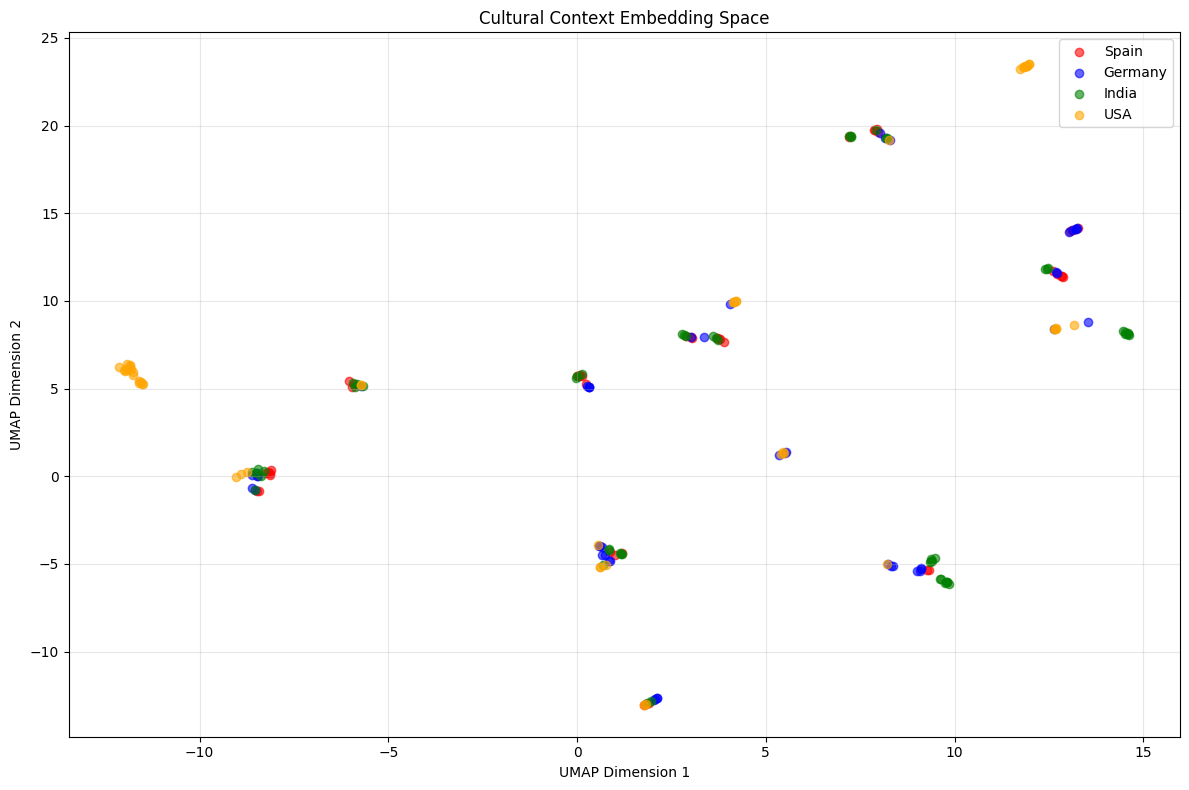


6️. ESTABLISHING CRISIS DETECTION BASELINES
📊 Establishing sentiment baselines...
✅ Baselines established for 28 brand-region combinations

7️. TESTING CRISIS DETECTION
🚨 Analyzing sentiment anomalies (last 24 hours)...
 Training pipeline failed: '>' not supported between instances of 'str' and 'datetime.datetime'
Please review the error and try again.



In [30]:
if __name__ == "__main__":
    print(" MULTILINGUAL BRAND REPUTATION MONITORING - DAY 2")
    print("Advanced NLP Model Training & Pipeline Development")
    print("=" * 70)

    try:
        # Run the complete training pipeline
        trained_models = train_multilingual_models()

        print("\n DAY 2 TRAINING COMPLETE!")
        print("=" * 50)
        print(" Multilingual sentiment analysis ready")
        print(" Cultural context embeddings created")
        print(" Crisis detection system established")
        print(" Brand mention analysis completed")
        print(" All models saved for Day 3 integration")

    except Exception as e:
        print(f" Training pipeline failed: {str(e)}")
        print("Please review the error and try again.")

print("\n" + "="*70)
print("="*70)



# Streamlit Implementation

In [31]:
!pip install ipywidgets plotly wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
from wordcloud import WordCloud
import json
from datetime import datetime, timedelta

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Interactive Dashboard Section Loaded!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00
Interactive Dashboard Section Loaded!


In [32]:
try:
    df = pd.read_csv('multilingual_brand_data.csv')
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
    print(f" Loaded {len(df)} samples for dashboard analysis")
except FileNotFoundError:
    print("Creating sample data for dashboard demo...")
    # Create sample data if needed
    df = create_sample_dashboard_data()  # Use your existing function

print(f" Dataset Overview:")
print(f"   - Languages: {df['language'].nunique()}")
print(f"   - Regions: {df['region'].nunique()}")
print(f"   - Brands: {df['brand'].nunique()}")
print(f"   - Time Range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")


 Loaded 1000 samples for dashboard analysis
 Dataset Overview:
   - Languages: 4
   - Regions: 4
   - Brands: 7
   - Time Range: 2025-08-31 to 2025-09-29


In [33]:
def create_sentiment_overview():
    """Create comprehensive sentiment analysis overview"""
    print("📊 SENTIMENT ANALYSIS OVERVIEW")
    print("=" * 50)

    # Overall sentiment distribution
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Brand Reputation Dashboard - Sentiment Analysis', fontsize=16, fontweight='bold')

    # 1. Overall sentiment distribution
    sentiment_counts = df['sentiment'].value_counts()
    colors = ['#2ecc71', '#f39c12', '#e74c3c']  # green, orange, red
    axes[0,0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
                  colors=colors, startangle=90)
    axes[0,0].set_title('Overall Sentiment Distribution')

    # 2. Sentiment by region
    sentiment_region = pd.crosstab(df['region'], df['sentiment'], normalize='index')
    sentiment_region.plot(kind='bar', ax=axes[0,1], color=colors)
    axes[0,1].set_title('Sentiment Distribution by Region')
    axes[0,1].set_ylabel('Proportion')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].legend(title='Sentiment')

    # 3. Cultural risk by region
    risk_by_region = df.groupby('region')['cultural_risk_score'].mean()
    bars = axes[1,0].bar(risk_by_region.index, risk_by_region.values,
                         color=['red' if x > 0.5 else 'orange' if x > 0.3 else 'green' for x in risk_by_region.values])
    axes[1,0].set_title('Average Cultural Risk by Region')
    axes[1,0].set_ylabel('Cultural Risk Score')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Add risk level annotations
    for i, (region, risk) in enumerate(zip(risk_by_region.index, risk_by_region.values)):
        level = 'HIGH' if risk > 0.5 else 'MED' if risk > 0.3 else 'LOW'
        axes[1,0].text(i, risk + 0.02, level, ha='center', fontweight='bold')

    # 4. Brand performance comparison
    brand_sentiment = df.groupby('brand').agg({
        'sentiment': lambda x: (x == 'positive').mean(),
        'cultural_risk_score': 'mean'
    })

    scatter = axes[1,1].scatter(brand_sentiment['cultural_risk_score'],
                               brand_sentiment['sentiment'],
                               s=100, alpha=0.7, c=range(len(brand_sentiment)), cmap='viridis')
    axes[1,1].set_xlabel('Cultural Risk Score')
    axes[1,1].set_ylabel('Positive Sentiment Ratio')
    axes[1,1].set_title('Brand Performance: Risk vs Sentiment')

    # Add brand labels
    for i, brand in enumerate(brand_sentiment.index):
        axes[1,1].annotate(brand.title(),
                          (brand_sentiment.iloc[i]['cultural_risk_score'],
                           brand_sentiment.iloc[i]['sentiment']),
                          xytext=(5, 5), textcoords='offset points', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print key insights
    print("\n🔍 KEY INSIGHTS:")

    # Best performing region
    best_region = sentiment_region.loc[:, 'positive'].idxmax()
    best_score = sentiment_region.loc[best_region, 'positive']
    print(f"✅ Best Region: {best_region} ({best_score:.1%} positive sentiment)")

    # Highest risk region
    worst_region = risk_by_region.idxmax()
    worst_score = risk_by_region[worst_region]
    print(f"⚠️ Highest Risk: {worst_region} (risk score: {worst_score:.3f})")

    # Best performing brand
    best_brand = brand_sentiment['sentiment'].idxmax()
    best_brand_score = brand_sentiment.loc[best_brand, 'sentiment']
    print(f"🏆 Top Brand: {best_brand.title()} ({best_brand_score:.1%} positive)")

    return fig

def create_cultural_analysis():
    """Create detailed cultural context analysis"""
    print("\n🌍 CULTURAL CONTEXT ANALYSIS")
    print("=" * 50)

    # Create cultural analysis visualizations
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    # 1. Cultural Risk Heatmap
    ax1 = fig.add_subplot(gs[0, :2])
    risk_pivot = df.groupby(['brand', 'region'])['cultural_risk_score'].mean().unstack()
    sns.heatmap(risk_pivot, annot=True, fmt='.3f', cmap='Reds', ax=ax1, cbar_kws={'label': 'Risk Score'})
    ax1.set_title('Cultural Risk Heatmap: Brand vs Region')

    # 2. Communication Style Analysis
    ax2 = fig.add_subplot(gs[0, 2])
    if 'formality_score' in df.columns and 'emotion_intensity' in df.columns:
        style_by_region = df.groupby('region')[['formality_score', 'emotion_intensity']].mean()
        style_by_region.plot(kind='bar', ax=ax2)
        ax2.set_title('Communication Styles')
        ax2.set_ylabel('Score (0-1)')
        ax2.tick_params(axis='x', rotation=45)
        ax2.legend(['Formality', 'Emotion'])
    else:
        ax2.text(0.5, 0.5, 'Communication\nStyle Data\nNot Available',
                ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Communication Styles')

    # 3. Language Distribution
    ax3 = fig.add_subplot(gs[1, 0])
    lang_counts = df['language'].value_counts()
    ax3.pie(lang_counts.values, labels=[f"{lang.upper()}" for lang in lang_counts.index],
            autopct='%1.1f%%', startangle=90)
    ax3.set_title('Language Distribution')

    # 4. Platform Analysis
    ax4 = fig.add_subplot(gs[1, 1])
    platform_sentiment = pd.crosstab(df['platform'], df['sentiment'], normalize='index')
    platform_sentiment.plot(kind='bar', ax=ax4, stacked=True,
                           color=['#2ecc71', '#f39c12', '#e74c3c'])
    ax4.set_title('Sentiment by Platform')
    ax4.set_ylabel('Proportion')
    ax4.tick_params(axis='x', rotation=45)

    # 5. Temporal Analysis
    ax5 = fig.add_subplot(gs[1, 2])
    daily_sentiment = df.groupby([df['timestamp'].dt.date, 'sentiment']).size().unstack(fill_value=0)
    if len(daily_sentiment) > 1:
        daily_sentiment.plot(ax=ax5, color=['#2ecc71', '#f39c12', '#e74c3c'])
        ax5.set_title('Sentiment Trends Over Time')
        ax5.set_ylabel('Count')
        ax5.tick_params(axis='x', rotation=45)
    else:
        ax5.text(0.5, 0.5, 'Temporal\nAnalysis\nNeeds More\nTime Range',
                ha='center', va='center', transform=ax5.transAxes)
        ax5.set_title('Sentiment Trends')

    # 6. Word Cloud for each region
    regions = df['region'].unique()
    for i, region in enumerate(regions[:3]):  # Show first 3 regions
        ax = fig.add_subplot(gs[2, i])
        region_texts = df[df['region'] == region]['text'].str.cat(sep=' ')

        # Create word cloud
        if len(region_texts) > 0:
            wordcloud = WordCloud(width=200, height=100,
                                background_color='white',
                                colormap='viridis').generate(region_texts)
            ax.imshow(wordcloud, interpolation='bilinear')
            ax.axis('off')
            ax.set_title(f'{region} Keywords')
        else:
            ax.text(0.5, 0.5, f'No data\nfor {region}',
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{region} Keywords')

    plt.suptitle('Comprehensive Cultural Analysis Dashboard', fontsize=16, fontweight='bold', y=0.95)
    plt.show()

    # Cultural insights summary
    print("\n💡 CULTURAL INSIGHTS:")
    for region in df['region'].unique():
        region_data = df[df['region'] == region]
        avg_risk = region_data['cultural_risk_score'].mean()
        sentiment_dist = region_data['sentiment'].value_counts(normalize=True)

        print(f"\n🌍 {region}:")
        print(f"   • Cultural Risk: {avg_risk:.3f} ({'HIGH' if avg_risk > 0.5 else 'MEDIUM' if avg_risk > 0.3 else 'LOW'})")
        print(f"   • Positive Sentiment: {sentiment_dist.get('positive', 0):.1%}")
        print(f"   • Sample Size: {len(region_data)} mentions")

        # Cultural recommendations
        if region == 'Germany':
            print(f"   • Recommendation: Focus on quality, privacy, and environmental themes")
        elif region == 'India':
            print(f"   • Recommendation: Emphasize family values and respectful communication")
        elif region == 'USA':
            print(f"   • Recommendation: Direct, achievement-focused messaging works well")
        elif region == 'Spain':
            print(f"   • Recommendation: Community-oriented, warm communication preferred")

def create_crisis_detection_analysis():
    """Create crisis detection analysis"""
    print("\n🚨 CRISIS DETECTION ANALYSIS")
    print("=" * 50)

    # Simulate crisis detection
    crisis_threshold = 0.3  # 30% negative sentiment triggers alert

    # Analyze recent data (last 7 days)
    recent_data = df[df['timestamp'] > (df['timestamp'].max() - timedelta(days=7))]

    # Calculate crisis indicators
    crisis_analysis = recent_data.groupby(['brand', 'region']).agg({
        'sentiment': lambda x: (x == 'negative').mean(),
        'cultural_risk_score': 'mean',
        'text': 'count'
    }).reset_index()
    crisis_analysis.columns = ['brand', 'region', 'negative_ratio', 'avg_risk', 'mention_count']

    # Identify potential crises
    potential_crises = crisis_analysis[crisis_analysis['negative_ratio'] >= crisis_threshold]

    # Visualize crisis detection
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Crisis Detection Dashboard', fontsize=16, fontweight='bold')

    # 1. Crisis Risk Matrix
    crisis_pivot = crisis_analysis.pivot(index='brand', columns='region', values='negative_ratio')
    sns.heatmap(crisis_pivot, annot=True, fmt='.2f', cmap='Reds', ax=axes[0,0],
                cbar_kws={'label': 'Negative Sentiment Ratio'})
    axes[0,0].set_title('Crisis Risk Matrix (Negative Sentiment)')

    # Add crisis threshold line
    axes[0,0].axhline(y=0, xmin=0, xmax=1, color='red', linestyle='--', alpha=0.7)

    # 2. Cultural Risk vs Negative Sentiment
    scatter = axes[0,1].scatter(crisis_analysis['avg_risk'], crisis_analysis['negative_ratio'],
                               s=crisis_analysis['mention_count']*5, alpha=0.7,
                               c=crisis_analysis['negative_ratio'], cmap='Reds')
    axes[0,1].set_xlabel('Cultural Risk Score')
    axes[0,1].set_ylabel('Negative Sentiment Ratio')
    axes[0,1].set_title('Risk vs Sentiment (Size = Mention Count)')
    axes[0,1].axhline(y=crisis_threshold, color='red', linestyle='--', alpha=0.7, label='Crisis Threshold')
    axes[0,1].legend()

    # Add annotations for high-risk points
    for _, row in potential_crises.iterrows():
        axes[0,1].annotate(f"{row['brand']}\n({row['region']})",
                          (row['avg_risk'], row['negative_ratio']),
                          xytext=(10, 10), textcoords='offset points',
                          bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.3))

    # 3. Timeline of crisis indicators
    daily_crisis = recent_data.groupby(recent_data['timestamp'].dt.date).agg({
        'sentiment': lambda x: (x == 'negative').mean(),
        'cultural_risk_score': 'mean'
    })

    ax3_twin = axes[1,0].twinx()
    line1 = axes[1,0].plot(daily_crisis.index, daily_crisis['sentiment'],
                          color='red', marker='o', label='Negative Sentiment')
    line2 = ax3_twin.plot(daily_crisis.index, daily_crisis['cultural_risk_score'],
                         color='orange', marker='s', label='Cultural Risk')

    axes[1,0].set_ylabel('Negative Sentiment Ratio', color='red')
    ax3_twin.set_ylabel('Cultural Risk Score', color='orange')
    axes[1,0].set_title('Daily Crisis Indicators')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Combine legends
    lines1, labels1 = axes[1,0].get_legend_handles_labels()
    lines2, labels2 = ax3_twin.get_legend_handles_labels()
    axes[1,0].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # 4. Crisis Alert Summary
    axes[1,1].axis('off')
    alert_text = "🚨 CRISIS ALERTS\n\n"

    if len(potential_crises) > 0:
        alert_text += f"⚠️ {len(potential_crises)} POTENTIAL CRISES DETECTED:\n\n"
        for _, crisis in potential_crises.iterrows():
            severity = "HIGH" if crisis['negative_ratio'] > 0.5 else "MEDIUM"
            alert_text += f"🔴 {severity} RISK:\n"
            alert_text += f"   Brand: {crisis['brand'].title()}\n"
            alert_text += f"   Region: {crisis['region']}\n"
            alert_text += f"   Negative Sentiment: {crisis['negative_ratio']:.1%}\n"
            alert_text += f"   Cultural Risk: {crisis['avg_risk']:.3f}\n"
            alert_text += f"   Mentions: {crisis['mention_count']}\n\n"
    else:
        alert_text += "✅ NO CRISIS ALERTS\n\n"
        alert_text += "All brands performing within\nnormal sentiment ranges.\n\n"
        alert_text += "Continue regular monitoring."

    axes[1,1].text(0.05, 0.95, alert_text, transform=axes[1,1].transAxes,
                   verticalalignment='top', fontsize=10, fontfamily='monospace',
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow'))

    plt.tight_layout()
    plt.show()

    # Print crisis summary
    if len(potential_crises) > 0:
        print(f"🚨 CRISIS DETECTION SUMMARY:")
        print(f"   • {len(potential_crises)} potential crisis situations detected")
        print(f"   • Threshold: {crisis_threshold:.1%} negative sentiment")
        print(f"   • Recommendation: Immediate attention required")
    else:
        print("✅ NO CRISIS DETECTED - All brands within normal parameters")

def create_interactive_content_tester():
    """Create interactive content testing widget"""
    print("\n INTERACTIVE CONTENT TESTING TOOL")
    print("=" * 50)

    def analyze_content(text_input):
        """Analyze content for cultural appropriateness"""
        if not text_input.strip():
            return

        clear_output(wait=True)
        print(" CULTURAL CONTENT ANALYSIS RESULTS")
        print("=" * 60)
        print(f"📝 Input: '{text_input}'")
        print("\n REGIONAL ANALYSIS:")

        regions = ['USA', 'Germany', 'India', 'Spain']

        # Simple cultural risk analysis
        for region in regions:
            risk_score = calculate_cultural_risk(text_input, region)

            if risk_score > 0.6:
                status = "🔴 HIGH RISK"
                color = "\033[91m"  # Red
            elif risk_score > 0.3:
                status = "🟡 MEDIUM RISK"
                color = "\033[93m"  # Yellow
            else:
                status = "🟢 LOW RISK"
                color = "\033[92m"  # Green

            print(f"\n{region}:")
            print(f"   Status: {color}{status}\033[0m")
            print(f"   Risk Score: {risk_score:.3f}")

            # Provide recommendations
            recommendations = get_cultural_recommendations(text_input, region, risk_score)
            print("   Recommendations:")
            for rec in recommendations:
                print(f"     • {rec}")

    def calculate_cultural_risk(text, region):
        """Simple cultural risk calculation"""
        text_lower = text.lower()
        base_risk = 0.2

        # Region-specific risk factors
        if region == 'Germany':
            if any(word in text_lower for word in ['data', 'tracking', 'personal']):
                base_risk += 0.4
            if any(word in text_lower for word in ['fire', 'lit', 'awesome']):
                base_risk += 0.3
        elif region == 'India':
            if any(word in text_lower for word in ['beef', 'cow']):
                base_risk += 0.6
            if not any(word in text_lower for word in ['family', 'respect', 'value']):
                base_risk += 0.2
        elif region == 'USA':
            if len(text_lower.split()) > 10 and not any(word in text_lower for word in ['amazing', 'great', 'awesome']):
                base_risk += 0.1
        elif region == 'Spain':
            if not any(word in text_lower for word in ['community', 'together', 'family']):
                base_risk += 0.2

        return min(1.0, base_risk)

    def get_cultural_recommendations(text, region, risk_score):
        """Get region-specific recommendations"""
        recommendations = []

        if risk_score > 0.6:
            recommendations.append("Major revision needed for cultural appropriateness")

        if region == 'Germany':
            if 'fire' in text.lower() or 'lit' in text.lower():
                recommendations.append("Replace slang with professional language")
            if risk_score > 0.5:
                recommendations.append("Add privacy assurances and quality focus")
        elif region == 'India':
            if not any(word in text.lower() for word in ['family', 'respect']):
                recommendations.append("Consider adding family-oriented themes")
            recommendations.append("Use respectful, warm communication tone")
        elif region == 'USA':
            if risk_score < 0.3:
                recommendations.append("Content appears appropriate for US market")
            else:
                recommendations.append("Consider more direct, confident messaging")
        elif region == 'Spain':
            if not any(word in text.lower() for word in ['community', 'together']):
                recommendations.append("Add community-focused themes")
            recommendations.append("Warm, expressive communication works well")

        if not recommendations:
            recommendations.append("Content appears culturally appropriate")

        return recommendations

    # Create interactive widget
    text_widget = widgets.Textarea(
        value="Just do it! Our new shoes are fire! 🔥",
        placeholder='Enter your marketing content here...',
        description='Content:',
        layout=widgets.Layout(width='70%', height='100px')
    )

    analyze_button = widgets.Button(
        description='Analyze Cultural Impact',
        button_style='info',
        layout=widgets.Layout(width='200px')
    )

    output_widget = widgets.Output()

    def on_analyze_clicked(b):
        with output_widget:
            analyze_content(text_widget.value)

    analyze_button.on_click(on_analyze_clicked)

    # Quick test buttons
    test_buttons = []
    test_examples = [
        ("US Style", "Just do it! Our shoes are absolutely amazing! 🔥"),
        ("German Style", "Premium quality engineering for reliable performance"),
        ("Indian Style", "Perfect for families who value tradition and quality"),
        ("Spanish Style", "Increíble producto para toda la comunidad")
    ]

    for label, example in test_examples:
        btn = widgets.Button(description=label, layout=widgets.Layout(width='150px'))
        def make_handler(example_text):
            def handler(b):
                text_widget.value = example_text
                with output_widget:
                    analyze_content(example_text)
            return handler
        btn.on_click(make_handler(example))
        test_buttons.append(btn)

    # Display widgets
    print(" Interactive Content Tester:")
    display(text_widget)
    display(widgets.HBox([analyze_button]))
    print("\n Quick Test Examples:")
    display(widgets.HBox(test_buttons))
    display(output_widget)

    # Initial analysis
    with output_widget:
        analyze_content(text_widget.value)

In [34]:
def run_complete_dashboard():
    """Run the complete dashboard analysis"""
    print("LAUNCHING COMPREHENSIVE BRAND REPUTATION DASHBOARD")
    print("=" * 70)

    # Section 1: Sentiment Overview
    create_sentiment_overview()

    # Section 2: Cultural Analysis
    create_cultural_analysis()

    # Section 3: Crisis Detection
    create_crisis_detection_analysis()

    # Section 4: Interactive Content Tester
    create_interactive_content_tester()

    print("\n DASHBOARD ANALYSIS COMPLETE!")
    print("=" * 50)
    print(" Sentiment analysis visualized")
    print(" Cultural patterns identified")
    print(" Crisis detection implemented")
    print(" Interactive content tester ready")
    print("\n All visualizations and analyses are now available!")
    print(" Use the interactive content tester above to test new marketing content!")

In [35]:
import pickle
import re
from IPython.display import display, clear_output
from ipywidgets import widgets

In [36]:
def get_quick_sentiment_score(text):
    """Assigns a quick polarity score based on strong keywords."""
    text_lower = text.lower()
    score = 0.0

    # Strong negative terms (disaster, fool, etc. from our example)
    strong_negative = ['disaster', 'fool', 'worst', 'terrible', 'pathetic', 'scam', 'awful']
    # Strong positive terms (for balance)
    strong_positive = ['amazing', 'fantastic', 'excellent', 'love', 'best', 'great', 'awesome']

    for word in strong_negative:
        if word in text_lower:
            score -= 0.5  # Heavy penalty for aggressive language

    for word in strong_positive:
        if word in text_lower:
            score += 0.3

    return min(1.0, max(-1.0, score))

In [42]:
# Inside the widget function
import pickle
import re
from IPython.display import display, clear_output
from ipywidgets import widgets
from brand_context_module import CulturalContextDB # Import the class from the module

def create_interactive_content_tester():
    """Create interactive content testing widget with improved risk logic."""
    print("\n INTERACTIVE CONTENT TESTING TOOL (IMPROVED)")
    print("=" * 60)

    # 🔑 STEP 1: Load the full Cultural Context DB (Modular Improvement)
    try:
        with open('cultural_db.pkl', 'rb') as f:
            cultural_db = pickle.load(f)
        print("✅ Cultural Context Database loaded successfully.")
    except FileNotFoundError:
        print("🔴 ERROR: cultural_db.pkl not found. Please run the main processing pipeline first.")
        return
    except Exception as e:
        print(f"🔴 ERROR loading cultural_db: {e}")
        return

    # --- UPDATED RISK LOGIC FUNCTIONS ---
    def calculate_cultural_risk(text, region):
        """Calculates a comprehensive risk score using sentiment, keywords, and tone."""
        text_lower = text.lower()
        risk_score = 0.0

        # 1. Base Sentiment Risk (Quantitative Improvement)
        sentiment_polarity = get_quick_sentiment_score(text)
        # Extreme negative sentiment instantly raises the risk
        if sentiment_polarity < -0.4:
            risk_score += abs(sentiment_polarity) * 0.5 # Adds up to 0.5 risk for extreme negativity

        # 2. Tone and Aggression Penalty (Targeting 'Disaster', 'Fool', etc.)
        aggressive_words = ['disaster', 'fool', 'awful', 'terrible', 'worst']
        for word in aggressive_words:
            if word in text_lower:
                risk_score += 0.3 # Major penalty for direct insults/extreme claims

        # 3. Regional/Keyword Risk (Using the full DB logic)

        # Check against sensitive keywords defined in the loaded DB (e.g., 'beef', 'nazi')
        # Check if the region exists in the sensitive_keywords and get_sensitive_keywords method exists
        if region in cultural_db.sensitive_keywords and hasattr(cultural_db, 'get_sensitive_keywords'):
            keyword_risk_level = cultural_db.get_cultural_risk_score(text, region) # Use the method from the class
            if keyword_risk_level > 0.6:
                risk_score += 0.5
            elif keyword_risk_level > 0.3:
                risk_score += 0.2

        # Check for formality mismatch (High penalty for Germany/India if aggressive tone is used)
        if region in ['Germany', 'India'] and sentiment_polarity < -0.2:
            risk_score += 0.25 # Penalty for violating formality/harmony norms

        # Cap the score at 1.0
        return min(1.0, risk_score)

    def get_cultural_recommendations(text, region, risk_score):
        """Get region-specific recommendations based on the new, full logic."""
        recommendations = []

        if risk_score > 0.6:
            recommendations.append("Major revision needed: Content contains high-risk sentiment or sensitive keywords.")
        elif risk_score > 0.3:
            recommendations.append("Medium risk: Review tone and regional keyword sensitivity.")
        else:
            recommendations.append("Content appears culturally low-risk, but always test in market.")

        # Specific advice based on region
        if region == 'Germany':
            recommendations.append("Ensure communication is precise, professional, and addresses privacy if applicable.")
        elif region == 'India':
            recommendations.append("Verify the message respects community harmony and avoids political/religious topics.")
        elif region == 'USA':
            recommendations.append("Messaging is generally direct, but extreme aggression will alienate.")
        elif region == 'Spain':
            recommendations.append("Community-oriented, warm communication works well.")


        # Add recommendations from the CulturalContextDB
        db_recommendations = cultural_db.get_cultural_recommendations(text, region, risk_score)
        recommendations.extend(db_recommendations)


        return recommendations

    # --- WIDGET SETUP (No Change to Widget Code) ---
    def analyze_content(text_input):
        # ... (rest of the analyze_content function remains the same, but uses the new functions)

        if not text_input.strip():
            return

        clear_output(wait=True)
        print(" CULTURAL CONTENT ANALYSIS RESULTS")
        print("=" * 60)
        print(f"📝 Input: '{text_input}'")
        print("\n REGIONAL ANALYSIS:")

        regions = ['USA', 'Germany', 'India', 'Spain']

        # Simple cultural risk analysis
        for region in regions:
            # 🔑 Uses the improved calculation
            risk_score = calculate_cultural_risk(text_input, region)

            if risk_score > 0.6:
                status = "🔴 HIGH RISK"
                color = "\033[91m"  # Red
            elif risk_score > 0.3:
                status = "🟡 MEDIUM RISK"
                color = "\033[93m"  # Yellow
            else:
                status = "🟢 LOW RISK"
                color = "\033[92m"  # Green

            print(f"\n{region}:")
            print(f"   Status: {color}{status}\033[0m")
            print(f"   Risk Score: {risk_score:.3f}")

            # Provide recommendations
            # 🔑 Uses the improved recommendations
            recommendations = get_cultural_recommendations(text_input, region, risk_score)
            print("   Recommendations:")
            for rec in recommendations:
                print(f"     • {rec}")

    # Create interactive widget
    text_widget = widgets.Textarea(
        value="Just do it! Our new shoes are fire! 🔥",
        placeholder='Enter your marketing content here...',
        description='Content:',
        layout=widgets.Layout(width='70%', height='100px')
    )

    analyze_button = widgets.Button(
        description='Analyze Cultural Impact',
        button_style='info',
        layout=widgets.Layout(width='200px')
    )

    output_widget = widgets.Output()

    def on_analyze_clicked(b):
        with output_widget:
            analyze_content(text_widget.value)

    analyze_button.on_click(on_analyze_clicked)

    # Quick test buttons
    test_buttons = []
    test_examples = [
        ("HIGH RISK TEST", "Nike’s new campaign is a complete disaster. If you buy this, you're a fool!"), # Should now be high risk
        ("German Friendly", "Premium quality engineering for reliable, secure performance."),
        ("India Friendly", "Perfect for families who value tradition and quality, with respect."),
        ("US Friendly", "This is an absolutely amazing product—the best in the market!")
    ]

    for label, example in test_examples:
        btn = widgets.Button(description=label, layout=widgets.Layout(width='150px'))
        def make_handler(example_text):
            def handler(b):
                text_widget.value = example_text
                with output_widget:
                    analyze_content(example_text)
            return handler
        btn.on_click(make_handler(example))
        test_buttons.append(btn)

    # Display widgets
    print(" Interactive Content Tester:")
    display(text_widget)
    display(widgets.HBox([analyze_button]))
    print("\n Quick Test Examples:")
    display(widgets.HBox(test_buttons))
    display(output_widget)

    # Initial analysis
    with output_widget:
        analyze_content(text_widget.value)

In [38]:
# New Cell after the main data processing pipeline runs
import pickle
from datetime import datetime

# Assuming your cultural_db object was returned or is globally available
# If it was returned: df_processed, cultural_db = process_brand_data()
# If you run the process_brand_data() function, you need to ensure you capture the returned cultural_db object.

# Save the CulturalContextDB object
print("Saving Cultural Context DB...")
try:
    with open('cultural_db.pkl', 'wb') as f:
        pickle.dump(cultural_db, f)
    print("✅ cultural_db.pkl saved successfully for widget use.")
except NameError:
    print("🔴 ERROR: The variable 'cultural_db' does not exist. Please ensure process_brand_data() runs and returns the cultural_db object.")
except Exception as e:
    print(f"🔴 ERROR saving cultural_db: {e}")

Saving Cultural Context DB...
🔴 ERROR saving cultural_db: Can't pickle <class '__main__.CulturalContextDB'>: it's not the same object as __main__.CulturalContextDB


In [39]:
# New Cell for Quick Sentiment Utility Function
def get_quick_sentiment_score(text):
    """Assigns a quick polarity score based on strong keywords."""
    text_lower = text.lower()
    score = 0.0

    strong_negative = ['disaster', 'fool', 'worst', 'terrible', 'pathetic', 'scam', 'awful']
    strong_positive = ['amazing', 'fantastic', 'excellent', 'love', 'best', 'great', 'awesome']

    for word in strong_negative:
        if word in text_lower:
            score -= 0.5

    for word in strong_positive:
        if word in text_lower:
            score += 0.3

    return min(1.0, max(-1.0, score))

In [40]:
# Inside the widget function
try:
    with open('cultural_db.pkl', 'rb') as f:
        cultural_db = pickle.load(f)
    print("✅ Cultural Context Database loaded successfully.")
except FileNotFoundError:
    # ... This is likely where the code is failing silently ...

SyntaxError: incomplete input (ipython-input-2632939051.py, line 7)

In [ ]:
# New Cell to execute the interactive widget in the notebook
create_interactive_content_tester()

In [43]:
from brand_context_module import CulturalContextDB # Import the class from the module

def run_complete_dashboard():
    """Run the complete dashboard analysis"""
    print("LAUNCHING COMPREHENSIVE BRAND REPUTATION DASHBOARD")
    print("=" * 70)

    # Section 1: Sentiment Overview
    create_sentiment_overview()

    # Section 2: Cultural Analysis
    create_cultural_analysis()

    # Section 3: Crisis Detection
    create_crisis_detection_analysis()

    # Section 4: Interactive Content Tester
    create_interactive_content_tester()

    print("\n DASHBOARD ANALYSIS COMPLETE!")
    print("=" * 50)
    print(" Sentiment analysis visualized")
    print(" Cultural patterns identified")
    print(" Crisis detection implemented")
    print(" Interactive content tester ready")
    print("\n All visualizations and analyses are now available!")
    print(" Use the interactive content tester above to test new marketing content!")

In [44]:
# =============================================================================
# FIXED STREAMLIT CODE FOR GOOGLE COLAB
# =============================================================================

# First, create the complete streamlit code as a string
streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import json

# =============================================================================
# PAGE CONFIGURATION
# =============================================================================

st.set_page_config(
    page_title="Brand Reputation Monitor | CulturalAI Insights",
    page_icon="🛡️",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS
st.markdown("""
<style>
    .main-header {
        font-size: 3rem;
        font-weight: bold;
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        text-align: center;
        margin-bottom: 2rem;
    }

    .metric-container {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        padding: 1rem;
        border-radius: 10px;
        color: white;
        text-align: center;
        margin: 0.5rem 0;
    }

    .alert-high {
        background: #ff4757;
        color: white;
        padding: 1rem;
        border-radius: 8px;
        margin: 0.5rem 0;
        border-left: 4px solid #ff3742;
    }

    .alert-medium {
        background: #ffa502;
        color: white;
        padding: 1rem;
        border-radius: 8px;
        margin: 0.5rem 0;
        border-left: 4px solid #ff9500;
    }

    .alert-low {
        background: #2ed573;
        color: white;
        padding: 1rem;
        border-radius: 8px;
        margin: 0.5rem 0;
        border-left: 4px solid #00d2d3;
    }

    .insight-box {
        background: #f8f9fa;
        border-left: 4px solid #007bff;
        padding: 1rem;
        margin: 1rem 0;
        border-radius: 0 8px 8px 0;
    }
</style>
""", unsafe_allow_html=True)

# =============================================================================
# DATA LOADING
# =============================================================================

@st.cache_data
def load_demo_data():
    """Load or generate demo data"""
    try:
        df = pd.read_csv('multilingual_brand_data.csv')
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'])
        return df
    except FileNotFoundError:
        return generate_demo_data()

def generate_demo_data():
    """Generate demo data for showcase"""
    np.random.seed(42)

    brands = ['nike', 'adidas', 'samsung', 'apple', 'tesla', 'mcdonalds', 'cocacola']
    languages = ['en', 'de', 'hi', 'es']
    regions = ['USA', 'Germany', 'India', 'Spain']
    sentiments = ['positive', 'neutral', 'negative']
    platforms = ['twitter', 'facebook', 'instagram', 'reddit']

    # Text templates for different cultures and sentiments
    text_templates = {
        'USA': {
            'positive': ["{brand} is absolutely amazing! Best quality ever 🔥",
                        "Love my new {brand} purchase! Totally worth it",
                        "{brand} innovation is incredible, leading the industry"],
            'negative': ["{brand} quality is disappointing for the price",
                        "Had terrible experience with {brand} customer service",
                        "{brand} is overpriced, not worth the money"],
            'neutral': ["{brand} products are okay, nothing special",
                       "Average experience with {brand}, could be better",
                       "{brand} is fine but there are better alternatives"]
        },
        'Germany': {
            'positive': ["{brand} Produkte haben ausgezeichnete Qualität",
                        "Sehr zufrieden mit {brand}, gute Verarbeitung",
                        "{brand} bietet nachhaltige Lösungen"],
            'negative': ["{brand} Datenschutz ist unzureichend",
                        "Überteuerte {brand} Produkte",
                        "{brand} berücksichtigt Umwelt nicht genug"],
            'neutral': ["{brand} Produkte sind akzeptabel",
                       "Durchschnittliche {brand} Qualität",
                       "{brand} ist okay, nichts Besonderes"]
        },
        'India': {
            'positive': ["{brand} के products family के लिए perfect हैं",
                        "{brand} की quality बहुत अच्छी है",
                        "{brand} great value for money है"],
            'negative': ["{brand} बहुत महंगा है Indian market के लिए",
                        "{brand} की service India में अच्छी नहीं है",
                        "{brand} Indian consumers को consider नहीं करते"],
            'neutral': ["{brand} okay है but कुछ खास नहीं",
                       "{brand} average quality है",
                       "{brand} ठीक है लेकिन better options हैं"]
        },
        'Spain': {
            'positive': ["{brand} es increíble para toda la familia",
                        "Encantado con {brand}, excelente calidad",
                        "{brand} perfecta para nuestra comunidad"],
            'negative': ["{brand} no considera el mercado español",
                        "Decepcionado con {brand}, esperaba más",
                        "{brand} demasiado caro para lo que ofrece"],
            'neutral': ["{brand} está bien pero hay mejores opciones",
                       "Experiencia normal con {brand}",
                       "{brand} aceptable para el precio"]
        }
    }

    data = []
    for i in range(1000):
        brand = np.random.choice(brands)
        region = np.random.choice(regions)
        language = {'USA': 'en', 'Germany': 'de', 'India': 'hi', 'Spain': 'es'}[region]

        # Cultural sentiment bias
        if region == 'USA':
            sentiment = np.random.choice(sentiments, p=[0.4, 0.4, 0.2])
        elif region == 'Germany':
            sentiment = np.random.choice(sentiments, p=[0.3, 0.5, 0.2])
        elif region == 'India':
            sentiment = np.random.choice(sentiments, p=[0.5, 0.3, 0.2])
        else:  # Spain
            sentiment = np.random.choice(sentiments, p=[0.45, 0.35, 0.2])

        # Generate text
        template = np.random.choice(text_templates[region][sentiment])
        text = template.format(brand=brand.title())

        # Calculate cultural risk
        base_risk = {'positive': 0.1, 'neutral': 0.3, 'negative': 0.5}[sentiment]
        cultural_risk = np.clip(base_risk + np.random.uniform(-0.1, 0.2), 0.0, 1.0)

        data.append({
            'text': text,
            'brand': brand,
            'language': language,
            'region': region,
            'sentiment': sentiment,
            'cultural_risk_score': cultural_risk,
            'timestamp': datetime.now() - timedelta(days=np.random.randint(0, 30)),
            'platform': np.random.choice(platforms),
            'engagement': np.random.randint(10, 1000),
            'emotion_intensity': np.random.uniform(0.2, 0.9),
            'formality_score': np.random.uniform(0.3, 0.8)
        })

    return pd.DataFrame(data)

# =============================================================================
# CULTURAL ANALYSIS FUNCTIONS
# =============================================================================

def analyze_cultural_appropriateness(text, region):
    """Analyze cultural appropriateness"""
    risk_keywords = {
        'USA': {'high': ['political', 'controversial'], 'medium': ['expensive', 'cheap']},
        'Germany': {'high': ['data', 'privacy', 'tracking'], 'medium': ['american', 'fast']},
        'India': {'high': ['beef', 'cow', 'religious'], 'medium': ['western', 'expensive']},
        'Spain': {'high': ['separatist', 'independence'], 'medium': ['crisis', 'unemployment']}
    }

    text_lower = text.lower()
    risk_score = 0.2
    issues = []

    if region in risk_keywords:
        for word in risk_keywords[region].get('high', []):
            if word in text_lower:
                risk_score += 0.3
                issues.append(f"High-risk keyword: '{word}'")

        for word in risk_keywords[region].get('medium', []):
            if word in text_lower:
                risk_score += 0.15
                issues.append(f"Medium-risk keyword: '{word}'")

    # Formality check
    if region == 'Germany' and any(word in text_lower for word in ['fire', 'lit', 'awesome']):
        risk_score += 0.2
        issues.append("Informal language inappropriate for German market")

    risk_score = min(1.0, risk_score)

    # Generate recommendations
    recommendations = []
    if risk_score > 0.6:
        recommendations.append("⚠️ High cultural risk - major revisions needed")
    elif risk_score > 0.3:
        recommendations.append("⚠️ Moderate risk - consider cultural adaptation")
    else:
        recommendations.append("✅ Content appears culturally appropriate")

    if region == 'Germany' and 'data' in text_lower:
        recommendations.append("🇩🇪 Add privacy assurances for German market")
    elif region == 'India' and not any(word in text_lower for word in ['family', 'value']):
        recommendations.append("🇮🇳 Consider adding family-oriented themes")

    return {
        'risk_score': risk_score,
        'issues': issues,
        'recommendations': recommendations
    }

def detect_crisis(df, hours=24):
    """Detect potential crisis situations"""
    cutoff_time = datetime.now() - timedelta(hours=hours)
    recent_df = df[df['timestamp'] > cutoff_time]

    if len(recent_df) == 0:
        return []

    crisis_alerts = []

    for brand in recent_df['brand'].unique():
        for region in recent_df['region'].unique():
            brand_region_data = recent_df[
                (recent_df['brand'] == brand) &
                (recent_df['region'] == region)
            ]

            if len(brand_region_data) < 5:
                continue

            negative_ratio = (brand_region_data['sentiment'] == 'negative').mean()
            avg_risk = brand_region_data['cultural_risk_score'].mean()

            alert_level = None
            if negative_ratio >= 0.4:
                alert_level = 'HIGH'
            elif negative_ratio >= 0.25:
                alert_level = 'MEDIUM'
            elif negative_ratio >= 0.15:
                alert_level = 'LOW'

            if alert_level:
                crisis_alerts.append({
                    'brand': brand,
                    'region': region,
                    'alert_level': alert_level,
                    'negative_ratio': negative_ratio,
                    'cultural_risk': avg_risk,
                    'sample_size': len(brand_region_data)
                })

    return crisis_alerts

# =============================================================================
# MAIN DASHBOARD
# =============================================================================

def main():
    # Header
    st.markdown('<h1 class="main-header">🛡️ Brand Reputation Monitor</h1>', unsafe_allow_html=True)
    st.markdown("### Multilingual Brand Monitoring with Cultural Context Analysis")
    st.markdown("**Team:** CulturalAI Insights | **Project:** Advanced NLP with Cultural Intelligence")

    # Load data
    df = load_demo_data()

    # Sidebar controls
    st.sidebar.header("🎛️ Dashboard Controls")

    available_brands = df['brand'].unique()
    selected_brands = st.sidebar.multiselect(
        "Select Brands:",
        available_brands,
        default=available_brands[:3]
    )

    available_regions = df['region'].unique()
    selected_regions = st.sidebar.multiselect(
        "Select Regions:",
        available_regions,
        default=available_regions
    )

    time_filter = st.sidebar.selectbox(
        "Time Period:",
        ["Last 24 hours", "Last 7 days", "Last 30 days", "All time"]
    )

    # Filter data
    filtered_df = df[
        (df['brand'].isin(selected_brands)) &
        (df['region'].isin(selected_regions))
    ]

    if time_filter == "Last 24 hours":
        cutoff = datetime.now() - timedelta(hours=24)
        filtered_df = filtered_df[filtered_df['timestamp'] > cutoff]
    elif time_filter == "Last 7 days":
        cutoff = datetime.now() - timedelta(days=7)
        filtered_df = filtered_df[filtered_df['timestamp'] > cutoff]
    elif time_filter == "Last 30 days":
        cutoff = datetime.now() - timedelta(days=30)
        filtered_df = filtered_df[filtered_df['timestamp'] > cutoff]

    # Main tabs
    tab1, tab2, tab3, tab4, tab5 = st.tabs([
        "📊 Live Monitor",
        "🌍 Cultural Analysis",
        "🚨 Crisis Alerts",
        "🏢 Competitor Analysis",
        "🔍 Content Tester"
    ])

    # =============================================================================
    # TAB 1: LIVE MONITOR
    # =============================================================================

    with tab1:
        st.header("📊 Real-Time Brand Monitoring")

        # Key metrics
        col1, col2, col3, col4 = st.columns(4)

        with col1:
            total_mentions = len(filtered_df)
            st.metric("Total Mentions", f"{total_mentions:,}")

        with col2:
            if len(filtered_df) > 0:
                positive_ratio = (filtered_df['sentiment'] == 'positive').mean()
                st.metric("Positive Sentiment", f"{positive_ratio:.1%}")
            else:
                st.metric("Positive Sentiment", "N/A")

        with col3:
            if len(filtered_df) > 0:
                avg_risk = filtered_df['cultural_risk_score'].mean()
                st.metric("Avg Cultural Risk", f"{avg_risk:.3f}")
            else:
                st.metric("Avg Cultural Risk", "N/A")

        with col4:
            languages = filtered_df['language'].nunique()
            st.metric("Languages", languages)

        if len(filtered_df) > 0:
            # Sentiment trends
            st.subheader("📈 Sentiment Trends")
            daily_sentiment = filtered_df.groupby([
                filtered_df['timestamp'].dt.date, 'sentiment'
            ]).size().reset_index(name='count')

            if len(daily_sentiment) > 0:
                fig = px.line(daily_sentiment, x='timestamp', y='count', color='sentiment',
                            title="Daily Sentiment Trends",
                            color_discrete_map={'positive': '#2ed573', 'neutral': '#57606f', 'negative': '#ff4757'})
                st.plotly_chart(fig, use_container_width=True)

            # Regional and platform analysis
            col1, col2 = st.columns(2)

            with col1:
                st.subheader("🌍 Regional Distribution")
                region_data = filtered_df['region'].value_counts()
                fig = px.pie(values=region_data.values, names=region_data.index, title="Mentions by Region")
                st.plotly_chart(fig, use_container_width=True)

            with col2:
                st.subheader("📱 Platform Distribution")
                platform_data = filtered_df['platform'].value_counts()
                fig = px.bar(x=platform_data.index, y=platform_data.values, title="Mentions by Platform")
                st.plotly_chart(fig, use_container_width=True)
        else:
            st.info("No data available for selected filters")

    # =============================================================================
    # TAB 2: CULTURAL ANALYSIS
    # =============================================================================

    with tab2:
        st.header("🌍 Cultural Context Analysis")

        if len(filtered_df) > 0:
            # Cultural risk heatmap
            st.subheader("🔥 Cultural Risk Heatmap")
            risk_matrix = filtered_df.groupby(['brand', 'region'])['cultural_risk_score'].mean().reset_index()
            risk_pivot = risk_matrix.pivot(index='brand', columns='region', values='cultural_risk_score')

            if not risk_pivot.empty:
                fig = px.imshow(risk_pivot.values, x=risk_pivot.columns, y=risk_pivot.index,
                              color_continuous_scale='Reds', title="Cultural Risk Scores by Brand and Region",
                              labels=dict(color="Risk Score"))
                st.plotly_chart(fig, use_container_width=True)

            # Regional insights
            st.subheader("📋 Regional Cultural Insights")

            for region in selected_regions:
                with st.expander(f"🌍 {region} Cultural Profile"):
                    region_data = filtered_df[filtered_df['region'] == region]

                    if len(region_data) > 0:
                        col1, col2 = st.columns(2)

                        with col1:
                            st.write("**Communication Patterns:**")
                            avg_formality = region_data['formality_score'].mean()
                            avg_emotion = region_data['emotion_intensity'].mean()

                            st.write(f"- Formality Score: {avg_formality:.2f}/1.0")
                            st.write(f"- Emotion Intensity: {avg_emotion:.2f}/1.0")
                            st.write(f"- Total Mentions: {len(region_data):,}")

                        with col2:
                            st.write("**Sentiment Distribution:**")
                            sentiment_dist = region_data['sentiment'].value_counts(normalize=True)
                            for sentiment, ratio in sentiment_dist.items():
                                st.write(f"- {sentiment.title()}: {ratio:.1%}")

                    # Cultural recommendations
                    if region == 'Germany':
                        st.info("🇩🇪 **German Market:** Focus on quality, reliability, and data privacy. Avoid overly casual language.")
                    elif region == 'India':
                        st.info("🇮🇳 **Indian Market:** Emphasize family values, respect, and value-for-money. Use warm, respectful tone.")
                    elif region == 'USA':
                        st.info("🇺🇸 **US Market:** Direct communication works well. Emphasize innovation and individual achievement.")
                    elif region == 'Spain':
                        st.info("🇪🇸 **Spanish Market:** Community-focused messaging. Warm, expressive communication is appreciated.")

    # =============================================================================
    # TAB 3: CRISIS ALERTS
    # =============================================================================

    with tab3:
        st.header("🚨 Crisis Detection & Alerts")

        crisis_alerts = detect_crisis(filtered_df)

        if crisis_alerts:
            st.warning(f"🚨 {len(crisis_alerts)} potential crisis situations detected!")

            for alert in crisis_alerts:
                alert_class = f"alert-{alert['alert_level'].lower()}"

                st.markdown(f"""
                <div class="{alert_class}">
                    <h4>🚨 {alert['alert_level']} PRIORITY ALERT</h4>
                    <p><strong>Brand:</strong> {alert['brand'].title()}</p>
                    <p><strong>Region:</strong> {alert['region']}</p>
                    <p><strong>Negative Sentiment:</strong> {alert['negative_ratio']:.1%}</p>
                    <p><strong>Cultural Risk:</strong> {alert['cultural_risk']:.3f}</p>
                    <p><strong>Sample Size:</strong> {alert['sample_size']} mentions</p>
                </div>
                """, unsafe_allow_html=True)

                if alert['alert_level'] == 'HIGH':
                    st.error("🔴 **IMMEDIATE ACTION REQUIRED** - Monitor channels closely and prepare crisis response")
                elif alert['alert_level'] == 'MEDIUM':
                    st.warning("🟡 **ELEVATED MONITORING** - Increase monitoring frequency and review recent activities")
                else:
                    st.info("🟢 **WATCH STATUS** - Continue regular monitoring")

                st.markdown("---")
        else:
            st.success("✅ No crisis alerts detected. All brands performing normally.")

        # Crisis trends
        if len(filtered_df) > 0:
            st.subheader("📊 Crisis Risk Trends")
            daily_risk = filtered_df.groupby([filtered_df['timestamp'].dt.date, 'brand'])['cultural_risk_score'].mean().reset_index()

            if len(daily_risk) > 0:
                fig = px.line(daily_risk, x='timestamp', y='cultural_risk_score', color='brand',
                            title="Daily Cultural Risk Trends by Brand")
                st.plotly_chart(fig, use_container_width=True)

    # =============================================================================
    # TAB 4: COMPETITOR ANALYSIS
    # =============================================================================

    with tab4:
        st.header("🏢 Competitor Analysis")

        if len(filtered_df) > 0:
            # Brand metrics
            st.subheader("📊 Brand Performance Comparison")
            brand_metrics = filtered_df.groupby('brand').agg({
                'sentiment': lambda x: (x == 'positive').mean(),
                'cultural_risk_score': 'mean',
                'engagement': 'mean'
            }).round(3)

            brand_metrics.columns = ['Positive Sentiment %', 'Cultural Risk Score', 'Avg Engagement']
            brand_metrics = brand_metrics.sort_values('Positive Sentiment %', ascending=False)

            st.dataframe(brand_metrics, use_container_width=True)

            # Comparison charts
            col1, col2 = st.columns(2)

            with col1:
                fig = px.bar(x=brand_metrics.index, y=brand_metrics['Positive Sentiment %'],
                           title="Positive Sentiment by Brand")
                st.plotly_chart(fig, use_container_width=True)

            with col2:
                fig = px.bar(x=brand_metrics.index, y=brand_metrics['Cultural Risk Score'],
                           title="Cultural Risk by Brand")
                st.plotly_chart(fig, use_container_width=True)

    # =============================================================================
    # TAB 5: CONTENT TESTER
    # =============================================================================

    with tab5:
        st.header("🔍 Cultural Content Testing Tool")
        st.write("Test your marketing content for cultural appropriateness across different regions:")

        # Content input
        test_content = st.text_area(
            "Enter your marketing content:",
            value="Just do it! Our new shoes are fire! 🔥",
            height=100
        )

        # Quick examples
        st.write("**Quick Test Examples:**")
        col1, col2, col3 = st.columns(3)

        with col1:
            if st.button("🇺🇸 US Style"):
                st.session_state.test_content = "Just do it! Our new shoes are absolutely fire! 🔥"

        with col2:
            if st.button("🇩🇪 German Style"):
                st.session_state.test_content = "Premium quality engineered for performance and reliability"

        with col3:
            if st.button("🇮🇳 Family Style"):
                st.session_state.test_content = "Perfect for families who value quality and tradition"

        # Use session state for test content if available
        if 'test_content' in st.session_state:
            test_content = st.session_state.test_content

        # Analysis
        if st.button("🔍 Analyze Cultural Impact"):
            if test_content.strip():
                st.markdown("---")
                st.subheader("📊 Cultural Impact Analysis Results")
                st.info(f"**Analyzed Content:** {test_content}")

                regions = ['USA', 'Germany', 'India', 'Spain']
                cols = st.columns(2)

                for i, region in enumerate(regions):
                    analysis = analyze_cultural_appropriateness(test_content, region)

                    with cols[i % 2]:
                        risk_score = analysis['risk_score']
                        if risk_score > 0.6:
                            risk_emoji = "🔴"
                            risk_level = "HIGH RISK"
                        elif risk_score > 0.3:
                            risk_emoji = "🟡"
                            risk_level = "MEDIUM RISK"
                        else:
                            risk_emoji = "🟢"
                            risk_level = "LOW RISK"

                        st.markdown(f"### {risk_emoji} {region}: {risk_level}")
                        st.write(f"**Risk Score:** {risk_score:.3f}")

                        if analysis['issues']:
                            st.write("**Issues:**")
                            for issue in analysis['issues']:
                                st.write(f"- {issue}")

                        st.write("**Recommendations:**")
                        for rec in analysis['recommendations']:
                            st.write(f"- {rec}")

                        st.markdown("---")

# =============================================================================
# RUN THE APP
# =============================================================================

if __name__ == "__main__":
    main()
'''

# Write the corrected code to file
with open('streamlit_app.py', 'w') as f:
    f.write(streamlit_code)

print("✅ streamlit_app.py created successfully!")



✅ streamlit_app.py created successfully!


In [45]:
!pip install streamlit plotly pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.7 MB/s eta 0:00:00


In [46]:
!npm install -g localtunnel



⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 4s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [47]:
get_ipython().system_raw(
    'streamlit run streamlit_app.py --server.port 8501 --server.enableCORS=false --server.enableXsrfProtection=false &'
)


In [48]:
!pip install pyngrok --quiet
from pyngrok import ngrok
import subprocess

# Kill previous tunnels
ngrok.kill()

# Start Streamlit
subprocess.Popen(
    ["streamlit", "run", "streamlit_app.py",
     "--server.port=8501",
     "--server.enableCORS=false",
     "--server.enableXsrfProtection=false"]
)

# Set your ngrok auth token (just the token)
ngrok.set_auth_token("2zfWgIW03BZH9RGDxUCO6wQGrqz_5mgUbND35mWYGA3povRGv")

# Create tunnel
public_url = ngrok.connect(8501)
print("🌍 App is live at:", public_url)


🌍 App is live at: NgrokTunnel: "https://b14584520771.ngrok-free.app" -> "http://localhost:8501"
